# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/uk/tiree/dat.txt', 1.9, 4 
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path= './data/NCDC/europe/france/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
# file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend, try 2
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19560820  0000  FM-12  200    5.1         N
1       19560820  0300  FM-12  250    4.1         N
2       19560820  0600  FM-12  250    5.1         N
3       19560820  0900  FM-12  270    6.2         N
4       19560820  1200  FM-12  270    5.1         N
5       19560820  1800  FM-12  290    3.1         N
6       19560820  2100  FM-12  320    3.1         N
7       19560821  0000  FM-12  320    3.1         N
8       19560821  0300  FM-12  290    4.1         N
9       19560821  0600  FM-12  270    5.1         N
10      19560821  0900  FM-12  320    2.1         N
11      19560821  1200  FM-12   90    1.0         N
12      19560821  1800  FM-12  140    2.1         N
13      19560821  2100  FM-12  140    2.1         N
14      19560822  0300  FM-12  140    6.2         N
15      19560822  0600  FM-12  160    4.1         N
16      19560822  1200  FM-12  140    4.1         N
17      19560822  1800  FM-12  200    3.1         N
18      19560822  2100  FM-12  290    7.2         N
19      19560823  0300  FM-12  270    7.2         N
20      19560823  0900  FM-12  320    5.1         N
21      19560823  1200  FM-12  270    1.0         N
22      19560823  2100  FM-12  999    0.0         C
23      19560824  0000  FM-12  999    0.0         C
24      19560824  0300  FM-12  270    1.0         N
25      19560824  0600  FM-12   90    1.0         N
26      19560824  0900  FM-12  160    2.1         N
27      19560824  1200  FM-12  999    0.0         C
28      19560824  1800  FM-12  999    0.0         C
29      19560824  2100  FM-12  140    4.1         N
...          ...   ...    ...  ...    ...       ...
359333  20150301  0900  FM-15  270    4.0         N
359334  20150301  0930  FM-15  260    4.0         V
359335  20150301  1000  FM-15  250    4.0         V
359336  20150301  1030  FM-15  250    3.0         V
359337  20150301  1100  FM-15  260    4.0         N
359338  20150301  1130  FM-15  230    3.0         N
359339  20150301  1200  FM-15  230    2.0         V
359340  20150301  1230  FM-15  270    3.0         N
359341  20150301  1300  FM-15  240    2.0         V
359342  20150301  1330  FM-15  260    2.0         V
359343  20150301  1400  FM-15  250    2.0         V
359344  20150301  1430  FM-15  240    2.0         V
359345  20150301  1500  FM-15  999    0.0         C
359346  20150301  1530  FM-15  999    1.0         V
359347  20150301  1600  FM-15  999    1.0         V
359348  20150301  1630  FM-15  210    1.0         N
359349  20150301  1700  FM-15  999    1.0         V
359350  20150301  1730  FM-15  999    1.0         V
359351  20150301  1800  FM-15  999    1.0         V
359352  20150301  1830  FM-15  180    1.0         N
359353  20150301  1900  FM-15  160    1.0         N
359354  20150301  1930  FM-15  210    1.0         N
359355  20150301  2000  FM-15  230    2.0         N
359356  20150301  2030  FM-15  230    1.0         N
359357  20150301  2100  FM-15  240    2.0         N
359358  20150301  2130  FM-15  180    1.0         N
359359  20150301  2200  FM-15  160    1.0         N
359360  20150301  2230  FM-15  150    1.0         N
359361  20150301  2300  FM-15  190    2.0         N
359362  20150301  2330  FM-15  190    1.0         N

[359363 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

31.198 121.336


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


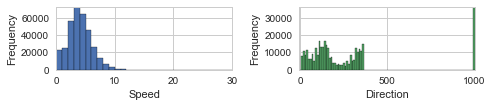

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  3.369710e+05  336971.000000  336971.000000  336971.000000   
mean   2.000006e+07    1128.070137     268.228497       3.543890   
std    1.115119e+05     691.735348     275.924866       2.002307   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.991120e+07     530.000000      90.000000       2.000000   
50%    2.002062e+07    1100.000000     200.000000       3.000000   
75%    2.010050e+07    1730.000000     320.000000       5.000000   
max    2.015030e+07    2357.000000     999.000000      30.000000   

               month   dir_windrose  
count  336971.000000  336971.000000  
mean        6.536892     248.807883  
std         3.448796     279.529540  
min         1.000000       0.000000  
25%         4.000000      90.000000  
50%         7.000000     150.000000  
75%        10.000000     310.000000  
max        12.000000     999.000000

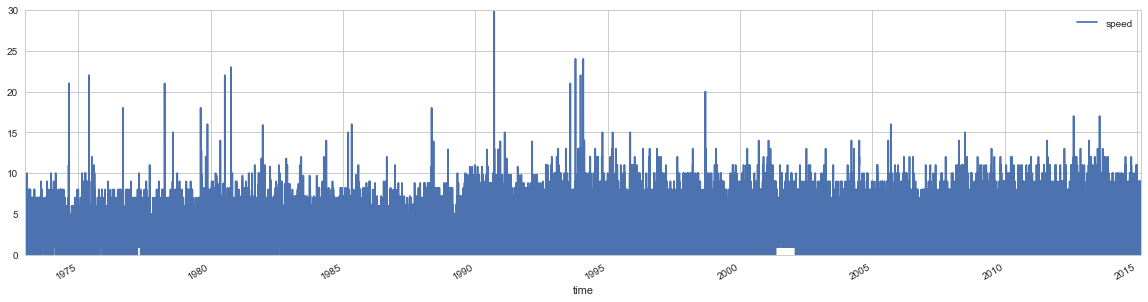

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False


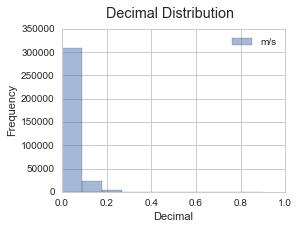

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

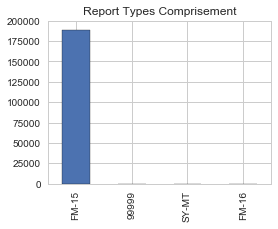

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

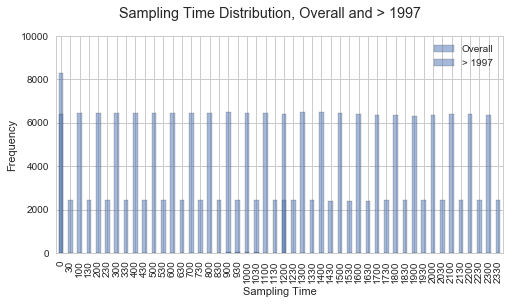

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0, 30]


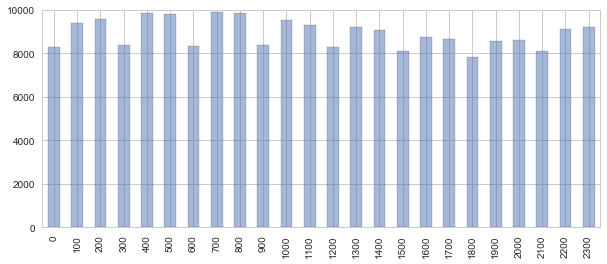

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1994-01-28 00:00:00  19940128     0  FM-15  119    3.0         N      1   
1994-07-18 10:00:00  19940718  1000  FM-15  337    5.0         N      7   
1994-08-05 11:00:00  19940805  1100  FM-15  335    9.0         N      8   
1994-08-10 05:00:00  19940810   500  FM-15  319   10.0         N      8   
1994-09-03 21:00:00  19940903  2100  FM-15  331    5.0         N      9   
1994-12-03 14:00:00  19941203  1400  FM-15  316    3.0         N     12   
1995-04-03 13:00:00  19950403  1300  FM-15  337    3.0         N      4   
1998-06-03 11:00:00  19980603  1100  FM-15   59   10.0         N      6   
1998-09-09 12:00:00  19980909  1200  FM-15  359   20.0         N      9   

                     dir_windrose  
time                               
1994-01-28 00:00:00           331  
1994-07-18 10:00:00           113  
1994-08-05 11:00:00           115  
1994-08-10 05:00:00           131  
1994-09-03 21:00:00           119  
1994-12-03 14:00:00           134  
1995-04-03 13:00:00           113  
1998-06-03 11:00:00            31  
1998-09-09 12:00:00            91

sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-12-21 22:00:00  19931221  2200  FM-15  110   22.0         N     12   
1993-08-02 14:00:00  19930802  1400  FM-15  140   21.0         N      8   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N      4   
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N      9   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N     12   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N     10   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N      8   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N     11   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N      8   
2008-07-02 08:00:00  20080702   800  FM-15  170   15.0         N      7   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-12-21 22:00:00           340   19.0           20.0  
1993-08-02 14:00:00           310   17.0           21.0  
1985-04-30 08:00:00           140    9.8            9.8  
2005-09-11 17:00:00            90    4.0            4.0  
1981-12-19 07:00:00           310   13.9            3.1  
1994-10-20 08:00:00           310    6.0            8.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
2012-08-08 04:00:00            90    2.0            0.0  
2008-07-02 08:00:00           280   10.0           13.0

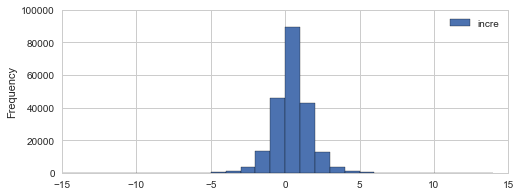

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N      9   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N      4   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N     12   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N      8   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N      8   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N     11   
1995-03-09 15:00:00  19950309  1500  FM-15  110   15.0         N      3   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N     10   
2013-03-09 17:00:00  20130309  1700  FM-15   80   14.0         N      3   
2005-08-06 03:00:00  20050806   300  FM-15  350   14.0         N      8   

                     dir_windrose  incre  incre_reverse  
time                                                     
2005-09-11 17:00:00            90    4.0            4.0  
1985-04-30 08:00:00           140    9.8            9.8  
1981-12-19 07:00:00           310   13.9            3.1  
2012-08-08 04:00:00            90    2.0            0.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
1995-03-09 15:00:00           340    4.0            3.0  
1994-10-20 08:00:00           310    6.0            8.0  
2013-03-09 17:00:00            10    8.0            2.0  
2005-08-06 03:00:00           100    4.0            1.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       5114
10      3736
20      3931
30      4370
40      4484
50      6036
60      6681
70      5524
80      5811
90      8968
100     8340
110     7085
120     7931
130     6770
140     4428
150     3796
160     3319
170     2573
180     2191
190     1555
200     1578
210     1991
220     1885
230     1882
240     2132
250     2360
260     3096
270     4399
280     4881
290     7184
300    11033
310     9313
320     9832
330    10032
340     7915
350     6258
999    25824
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0412621359223


0.0    15499
2.0     5486
1.0     4531
3.0      229
4.0       43
5.0       15
3.1        8
4.1        4
2.1        3
7.0        2
5.1        2
6.0        2
Name: speed, dtype: int64


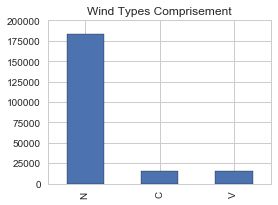

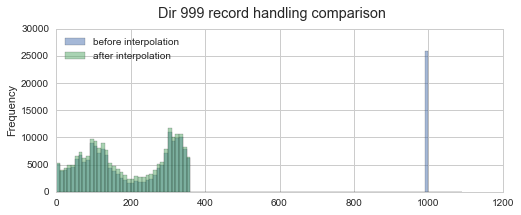

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

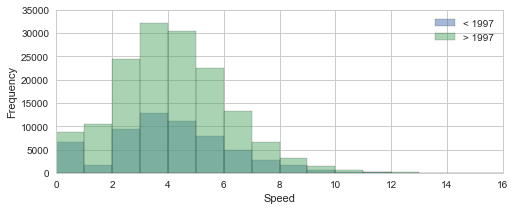

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

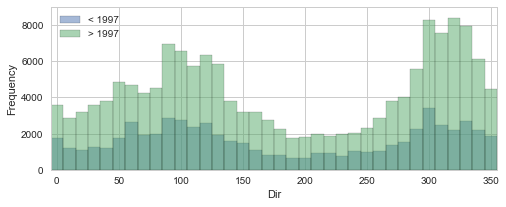

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


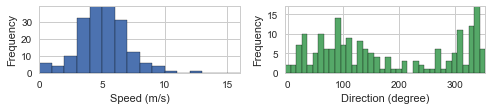

1980 - 1984


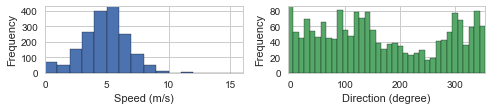

1985 - 1989


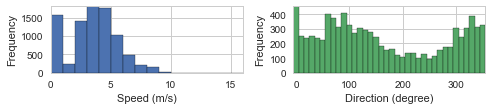

1990 - 1994


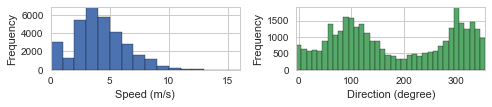

1995 - 1999


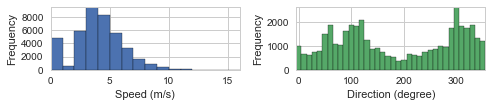

2000 - 2004


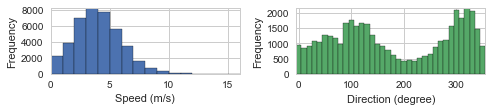

2005 - 2009


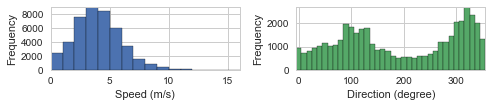

2010 - 2014


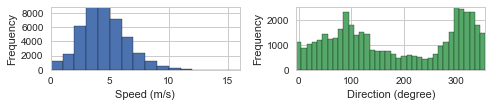

2015 - 2015


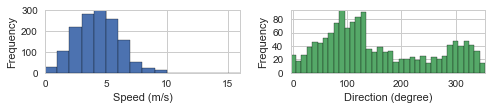

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 6.0)

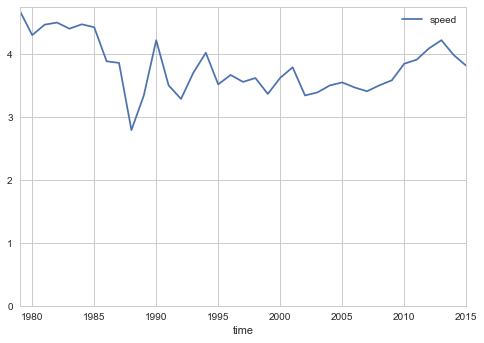

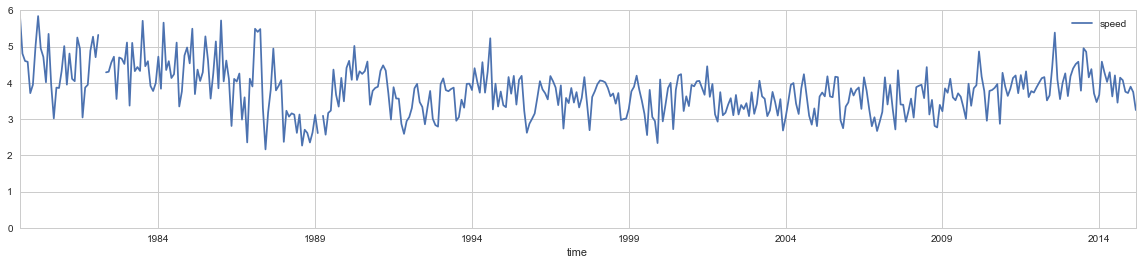

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADRJJREFUeJzt3W1sFNUaB/D/dre7bXdpK7RcFGhtKxUBCdZeayJiJGlQ
IkWDSrGxJkCCJopGKyoGqLCxjfLB2FQSk37QSoKkmpuA16DEGogvCE2rtKWQIHbplhbovr+/zLkf
elkp7sxsO92Z2e3zS0jonsnsk4V/d3b2nPNoGGMMhJApyVC6AEJSGQWIEAkoQIRIQAEiRAIKECES
UIAIkYACpAKMMWzduhVffPFF7DGHw4GGhgZUVVVh5cqV+Pjjj8FxXMLjQucm04cCpLBoNIrGxkac
PHlywuOvvPIKBgYGcODAAbS2tuL777/H/v37Ex4XOjeZRowoxmKxsNraWvboo4+yyspK1t7ezhhj
rLe3l5WXl7O+vr7Ysd3d3Wzp0qXM6/WKjgudm0wvegdSUHd3N0pLS/H1119j1qxZscctFguysrKw
ZMmS2GOLFy9GOBxGb2+v6LjQucn00ildwExWU1ODmpqafzxeWFiIQCAAm82G2bNnAwCsVisAwGaz
iY4LnZtML3oHUqHly5ejuLgYe/bsgdPphN1uR3NzM3Q6HcLhsOg4kQ8FSIX0ej1aWlrw559/oqqq
CqtXr8aDDz6IvLw8mEwm0XEiH7qEU6m7774b33zzDcbGxmAymRCNRvHBBx9g4cKFCY0TedA7kAo5
nU4899xzsFqtmDNnDgwGAzo7O1FYWIiysjLRcSIfCpAK5eXlIRgMoqmpCX/99RdOnjyJvXv34uWX
X4ZGoxEdJ/KR/RKuq6tL7qdMCcFgEBaLJfb6bN26FW1tbaipqUFubi6efPJJLFq0KOFxoXMTYfff
f3/Cx2oYk3dFaldX16QKVArVOb3StU66hCNEAgoQIRJQgAiRgAJEiAQUIEIkoAARIgEFiBAJKECE
SJB2k0k5joPdbhc97rbbbkNGBv3+INKkXYDsdjsOnvoKxlz+af1elwd1VRswZ84cGSsj6SjtAgQA
xlwTZuXnKl0GmQHSLkCMMYRDYYRDId5jwqEwZJ4CSNKUaIA4jkNjYyPOnz8PvV4Ps9mM4uLi2PjR
o0fx2WefQavVory8HI2NjYp+tvD5fLCOOpEb5q/BZXPC5/PJWBVJV6L/048fP45QKIQvv/wSb7zx
Bpqbm2NjgUAAH330ET7//HMcOnQIHo8HnZ2dSS04EVqdDrrMTN4/Wl3avfEShYgGqKurCw8//DAA
YMWKFbFtk4DxtfuHDh1CdnY2ACASicBgMCSpVELUR/RXscfjmbBRhVarRSQSgU6nQ0ZGBgoKCgAA
7e3t8Pl8eOihh0SfNJkLu0ZGRuBwOhAVWJjpdjpw9uxZXLt2TfBcqbIAjepUjmiATCYTvF5v7GeO
46C76RKI4zh8+OGHuHTpElpaWhJaUpzMhVUWiwWnfYPI+/9+afFkMKCsrExwA45z586hsrIyGSVO
q3RdqKaUyYZcNEAVFRXo7OzE2rVr0dPTg/Ly8gnju3fvhl6vxyeffJIyX0xGIxGc6bdi1K2POx4I
+GDUBGSuiqQi0QBVV1fjp59+Qm1tLRhjeP/993HkyBH4fD4sW7YMHR0dqKysxAsvvAAAqK+vR3V1
ddILl8pgyEZ2Tg7/AUGHfMWQlCUaoIyMDOzdu3fCYzdvnTQwMDD9VRGSIlLjmosQlaIAESIBBYgQ
CVLuK3mx5Qp2ux1i09wYx8HtcsLpsMUd9/v8yDf8s10iIbdKuQCJLVewXrqMEDIFz+H3+tET/g3D
WUNxx90OJ1bNvUdyrST9pVyAAOHlCjkmE/yeoOg5skw5MObF79wWiVCPHZIY+gxEiAQUIEIkSLlL
OLEFc5EoXX4R+aRcgMQWzI1cdUFvzJa5KjJTpVyAgL8XzMWToRO+A0fIdKLPQIRIQAEiRIKUvIRL
Nobx/R5uXkh4q5ycHOpHSihA8UQjEVy46kFB/2jc8UDAh5UVJTAajTJXRtSGAsRDn6kXXnBHCOgz
ECGSUIAIkYACRIgEFCBCJKCbCHEwjoPX4xZccMdxhTJXRdRIkQCNjY0Jjivd/Mrv9WOYG0LG1fjf
87gdTqywF2LWrPjricjMoUiA/nPuGO+YWppfGYzZtOCOiFIkQNT8iqQLuolAiASiAeI4Drt378bG
jRvx/PPPY3Bw8B/H+P1+1NbW4uLFi0kpkhC1ktRgCwDOnj2Luro6XL58OWlFEqJWop+BhBpsAUAo
FEJrayt27NiR8JNeGR7mHfO6POgJ9iA/Pz/uuFj/H5fLCZ0hEwZb/FvQiRxzY9zGM55ofyG5pErf
nVSpczIkNdgCptbr5/Y77uAdc+e4sOKeFbx34cT6/3htTugMOswW6A8kdozX5oQv6OMd1zLg3nvv
RVFREe9zyCWV+u6kSp2TIXoJJ9Zgi5CZTDRAFRUVOHHiBADEbbBFyEwmqcHWxo0b5ahRdTiOg9Vq
FT1u/vz50Gq1MlRElCK5wdYN7e3t01eVynmcbrSf+S/mDt3Of4zDie1r6lTxOYkkD32YmSJTbi7y
5vDfqCAzA81EIEQCRd6B+LblHR8Lg4k1+CFEJRQJ0PA1/u2iXDYnfD6fjNUQMnWKBIhvW15gfNte
QlIFfQYiRAIKECESqO56iWG8hQnftro+nw90i4GoheoCFI1EcKbfilG3Pu64ZfAyuGhU5qoIiU91
AQIAgyGbd1tdgyEbiMhcECE86DMQIRJQgAiRQHWXcIzj4HY5eTc1dLucYBnqv40gdjMEoB5D6UB1
AfJ7/egJ/4bhrKG448NXLTDNVv+2WGI3Q6jHUHpQXYAAIMuUw7upYZYxNXr2MI5DKBhCKBSIOx4M
BMFxnMxVkemmygClA7F3UpfNjuK5OixYsEDwPEpvc0yEUYCSSOid1GW34+jAccxz8y/KU8s2x4Qf
BUhBObOMtM1xiqMAKYQBCIcjtDYqxVGAFBKNRDEy5oYmi9ZGpTIKkIJ0Wh2tjUpxdHuHEAkoQIRI
QNcIKpbIdCC6yaAs0QBxHIfGxkacP38eer0eZrMZxcXFsfEffvgBra2t0Ol02LBhA5599tmkFjyT
iE0H8vu90AbtNN9OQaIBurk/UE9PD5qbm3HgwAEAQDgcRlNTEzo6OpCdnY1NmzZh9erVKCgoSHrh
M4HYdCCX04nhESf0+aNxx/1+LyoW/0t0vh2FbOok9Qe6ePEiioqKkJeXB2C81cnp06fx+OOPC57T
Ocbfu8frckFr0PEeI3U80XP4Q4GkP4fYOa5fGcWVyBAKfHPjjrscDhQG58PpsMcddzptODJkgcnE
/2VtKBzAv5cuRA7PAsbpMjIyAovFwjueqlsgS+oP5PF4JrR6NxqN8Hg8ok+6rrSKf1BobDrGU+U5
Ej1GwHyBHkl/y4HX6xW8DJwO8+bNE2xIppZmZZMlGiCh/kC3jnm93gmBiicVmiwRkihJ/YHKysow
ODgIh8OBUCiEM2fO4L777ktetYSojIaJ3Ae9cRfuwoULsf5A/f39sf5AN+7CMcawYcMG1NXVyVU7
IYoTDRAhhB/NRCBEAgoQIRJQgAiRQLa5cGJTgtTkqaeein33tWDBAjQ1NSlc0d9+//137N+/H+3t
7RgcHMTbb78NjUaDRYsWYc+eParZP+HmOvv7+7Ft2zbceeedAIBNmzZh7dq1itYXDoexc+dOWK1W
hEIhvPTSS7jrrrsm/3oymRw7doy99dZbjDHGuru72YsvvijXU09KIBBg69evV7qMuD799FP2xBNP
sGeeeYYxxti2bdvYr7/+yhhjbNeuXey7775TsryYW+s8fPgwa2trU7iqiTo6OpjZbGaMMWa329kj
jzwypddTtl9

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFBlJREFUeJztnXtsFOW7x7/d3e6lu225FQSxnNMKCiqRi+AfKrFHxMMB
NBYpYGqMYCBGLkEJVCg0UATUHyYiIUI0ngCGEuSn4aAHEQjwg8OlBUTuAWRrC6Xtdva+3du8548t
093tttvL7M7s7vNJmnRn9p15Zna/+77zvs/7fdMYYwwEQcQVhdQBEEQqQsIjCAkg4RGEBJDwCEIC
SHgEIQEkPIKQABJegsEYw9y5c7Fz505hm9lsxscff4zx48fjhRdewFdffQWe5zu9v6NjE7GBhJdA
+P1+lJWV4cSJEyHbFyxYgOvXr2Pr1q3YsmULDh06hC+++KLT+zs6NhEjGJEQVFdXs5kzZ7KXX36Z
jR07lu3YsYMxxtjly5fZsGHD2JUrV4T3XrhwgT311FPM4XBE3d/RsYnYQTVegnDhwgXk5eVh3759
yMzMFLZXV1dDq9VixIgRwrYnn3wSXq8Xly9fjrq/o2MTsUMldQBE55g2bRqmTZvWZntOTg6am5vR
1NSEPn36AABqa2sBAE1NTVH3d3RsInZQjZfgjBw5EkOGDMHq1athsVjAcRw2bNgAlUoFr9cbdT8h
DSS8BEetVmPz5s24c+cOxo8fj4KCAjz//PPIzs6GwWCIup+QBmpqJgFPPPEEDhw4AJPJBIPBAL/f
j88++wyPPfZYp/YT8YdqvATHYrFg9uzZqK2tRd++faHRaHD06FHk5OQgPz8/6n5CGkh4CU52djbc
bjfWr1+Pu3fv4sSJE1izZg0+/PBDpKWlRd1PSIOsm5pVVVVShyBL3G43qqurhfszd+5cfPvtt5g2
bRqysrLwxhtvYOjQoZ3e39GxiY4ZM2ZMt8qlMSbfGehVVVXdvrB4QnGKSyrESU1NgpAAEh5BSEDU
Zzye51FWVoYbN25ArVajvLwcQ4YMEfYfOXIEW7ZsgUqlQmFhIWbMmNFuGZPJhJUrV8JqtQpd2rm5
uTG9QIKQI1GF9/vvv8Pj8aCiogIXL17Ehg0bsHXrVgCA1+vF+vXrsXfvXuh0OsyaNQsFBQU4f/58
xDKff/45pk6dismTJ+P06dO4c+cOCY9ISaI2NauqqvDiiy8CAJ599lkhsRYAbt++jdzcXGRnZ0Ot
VmPMmDE4d+5cu2XOnz+PBw8e4N1338X+/fsxbty4WFwTQcieqDWe3W4PSS1SKpXw+XxQqVSw2+0h
2ex6vR52u73dMrW1tcjKysL333+Pr7/+Gtu3b8eiRYs6PH+idGtTnOKSKHF2l6jCMxgMcDgcwmue
56FSqSLuczgcyMzMbLdMr169UFBQAAAoKCjAl19+GTXAZO9WjicUp7j05MchalNz9OjROH78OADg
4sWLGDZsmLAvPz8fRqMRZrMZHo8HlZWVGDVqVLtlxowZg2PHjgEAzp07h8cff7zbgRNEIhO1xps4
cSJOnjyJmTNngjGGTz/9FPv374fT6URRURGWL1+OOXPmgDGGwsJCDBgwIGIZAFi2bBlWrlyJ3bt3
w2Aw4B//+EfML5Ag5AhlrogAxSkuqRAnDaAThATIOklajvA8D47j2mwjxIExBpfLFdI5l5GRkXQz
KUh4XYTjOOw68yP0WYHhEofVjqc0NK9NLJxOJy7f4eDXPAAANDc78cLof4der5c4MnEh4XUDfZYB
mb2yAARqO0ujBSaTSdjfu3dvKBTUiu8uao0WuowMqcOIKSS8HuK0OXCz4Qa4a80AAjXg2+ML0bdv
X4kjI+QMCU8EdPoMoQYkiM5A7SGCkACq8YiEgjEGp9PZZhuAkJ5PufeEkvBEhud5waE5GOpwEQen
04l/nf8LWm1r54uZa0SaQons7N4AEqMnlIQnMk6bA/9s+BV9B/QTttnMVvzXE/8hWKgDJMSeoNVm
hPR6ulwZSFMoEqonNOWFF2lAvKei0GfpQzpb7BYb/nmpVYzU80mkvPAiDYjHQhThYiQ6B2OszdQz
GacXd5qUFx4QOiAeDcYYvB4vvB4PAMDr8SHxvwbypbnZhdOXzMLzm5lrhDbDgAwZP791BhJeF3E6
nah9YEGWN9AUrWuwQqvxSRxVcqPR6oTnN5er7XMcz/Nw2KxQtHRiupwu8HxOPEPsMiS8bqBUqaBK
T2/5XwmAhCcldpsVZx/8C708gccDm9mCZ7kcWS+yScLrIQyAz+cLaXoq1XRbuwvP87DbrLCYA0My
VosZmdm9opbTGfTQZweE5vPJf90/+ob0EL/PD7PLi3sNgQ6AugYrBmuUEkeVuHAch6uOC7DWB4TH
NTbiecUE9O3bL0rJxCJqnznP81i1ahWKiopQXFwMo9EYsv/IkSMoLCxEUVER9uzZ06ky+/fvR1FR
kYiXIS1KhRKq9HSo0tNbmp5hMAaPN9AhE/jzJkXPXKzQ6jOgz86EPjsTOkNid6K0R1wNbQHg6tWr
2Lt3b0p98bxeP+qtDviUgS+RtcnSJu2JSC3iamjLcRw2bdqETz75JBbXEhN4nofJZBL+OI5Dd34z
lApVUK1ILfxUJ26Gth6PBytWrEBJSQk0Gk2nA4y1sanZbMYDrg52px1AIL3rWP0xZGdnAwisuFpl
uQJ9ZqC2elBTB69aB77lJ8tqtUClSRfyMy1WK9KVbihUrb9pDY31sHkBVZM2cA6LGX/++ScaGhpi
em2RkLtRbF1dHQC03k+LGdWcEV5fwF7DYm6CQqGEydSaD1tbcxcWlRloaeZLeX87S9wMba9fvw6j
0YiysjK43W7cunUL69atw4oVKzo8f6zdpkwmE+5ee9A6gO5luNVcg76awMTWek8dBg0ehJyBAwAA
aqUGJrtbyLt0NFngdDuF126rHf1ysjBw0CDhHF6HF4qgMgo/j8GDB2Pw4MHCe+KRu5kI7l3V1dU4
dP8P4V4xrw+5WUMw5N/yAABNpkakKRTo3bs171WlAKwOrvX+soDna/Aa77GYrdCTH7Gowhs9ejSO
Hj2KyZMnd2hom5GRgcrKSsyZMwdpaWltyowcORIHDhwAANTU1GDJkiVRRScVwelddoutS2UZAK+3
dXgBAHz+0O5tl8OJ/7n+Ox6xDQRAuZti4/f5UHm1Fg9sagDynK0QV0PbVMDv86POZEOatrXGr6u3
Qq3XhbwvI5NyN4G28+vE6nTSaHSynq0QVXgKhQJr1qwJ2Zaf3+qqVVBQIKyH0FGZYAYPHiwMPSQj
KmVrZgsAKFTpIfvDa8VUHl4In19XbfwbvN8vcVSxh7rXJCC8Vkz14YXg+XUaTWjLgPE8bFZLlzNZ
5E7KCy/SbIN4pHwF14o0vNA+LocLF71ncU9bAwBoqq/H0/bRUClbO6JsVguYIrFaDCn/iUeabUAp
X/JCa8gQ8jCbGhpxsalViABwr74ahj6tz8vhtaQcZyukvPCASLMNCDkTLEQgkGIWTHgtKcfZCiQ8
IikJFqfX4wbHcSHDCVJ73pDwiKRHjuOmKSW8SJ6MTqezY+uGoJkFQNvBcCIxkNu4aUoJL5InY7Rx
o/CZBZEGw3sKa3E6e9gUerjsV3BTSOqmUazgeR4WMwePJ5CiZ7NaRB/TlOO4aUoJD2jryajR6EKc
G8I/JJ/fK8wsANoOhotBeFOovqYOynRVStgBchyHkzVHkdkrkJR+r74avMjfSjmOm6ac8KIR/iHF
ooaLRHBTyG6xQaVWyappJBbhPqYcxwkTX4FAD6XTLb4o5DZuKn0EMiT4Q4pFDZfKhPuY1v71NzxI
vXtMwiPiTrCPaYbBAJfdLXFE8YeER8SMSPb4JpMJHrcn5XuJZS+84Am1QM8mNIb3oAHyyPNr2+uW
HBaB4c1KINC

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6NJREFUeJzt3X9M1Pfhx/HncQLq/dCyrEmzihGVRGMQOWaX9KS1WUeX
zNUZPbkzNMbqVuOP4go7f4CUWKukX1hLG9bWujQBgbHarL+WbKsxMMWR5hw2osyMObTaWsWm3lEB
PT7fPxpZmRb8wMGd7vX4S9+87+3rLfri7nOfz+cshmEYiIjIbYuLdgARkTuNilNExCQVp4iISSpO
ERGTVJwiIiapOEVETBp3O5N+9rOfYbfbAbj//vt56qmn2Lx5MxaLhZkzZ1JcXExcXBz19fXU1dUx
btw41q5dy8KFC+nu7qagoIDOzk5sNhulpaUkJSXR0tLCzp07sVqtuN1u1q9fP6obFRGJGGMI3d3d
xuOPPz5g7Be/+IXxt7/9zTAMwygqKjL+/Oc/G59//rnxk5/8xOjp6TGuXLnS/+vf/va3RkVFhWEY
hvH+++8bO3bsMAzDMH76058aHR0dRl9fn7F69WqjtbV1qCgiIjFhyJfqbW1tXL16lVWrVvHEE0/Q
0tJCa2sr8+fPByArK4umpiY+/vhj5s2bR0JCAg6Hg+TkZNra2ggEAixYsKB/7pEjRwiFQvT29pKc
nIzFYsHtdtPU1DS6PyFERCJkyJfq48eP58knn2TZsmX8+9//Zs2aNRiGgcViAcBmsxEMBgmFQjgc
jv7H2Ww2QqHQgPFvzr3x0v/G+NmzZwfNEQgEhrVBEZGhuFwuU/OHLM5p06YxdepULBYL06ZNY/Lk
ybS2tvZ/vaurC6fTid1up6ura8C4w+EYMD7YXKfTGfHNjZZAIKAst6Ast6YssZsDhvekbMiX6m+9
9Ra7d+8G4MKFC4RCIR588EGam5sBaGxsJDMzk7S0NAKBAD09PQSDQdrb20lNTSUjI4OGhob+uS6X
C7vdTnx8PGfOnMEwDA4dOkRmZqbp8CIi0TDkM86lS5eyZcsWvF4vFouF559/nnvuuYeioiLKy8tJ
SUkhOzsbq9VKbm4uPp8PwzDYtGkTiYmJeL1e/H4/Xq+X+Ph4ysrKACgpKSE/P59wOIzb7Wbu3Lmj
vlkRkUgYsjgTEhL6y+6bqqurbxrzeDx4PJ4BYxMmTKCiouKmuenp6dTX15vJKiISE3QCvIiISSpO
ERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNu6w7wEnnhcJj29vaI
rCMiY0vFGSXt7e3kbqlh4qR7h73GV19+jn9FWv9NpUVkbKg4o2jipHux3/O9aMcQEZN0jFNExCQV
p4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpJOgL+DGX19nD9/nlOnTo14renTp2O1
WiOQSuTup+K8g10NXqTqoIX9Rz8c0Tpfffk5Vbt8pKamRiiZyN1NxXmH02WbImNPxzhFREy6reLs
7OzkoYceor29nY6ODrxeLz6fj+LiYvr6+gCor69nyZIleDweDh48CEB3dzcbNmzA5/OxZs0aLl++
DEBLSwvLli0jJyeHV155ZZS2JiIyOoYszmvXrrF9+3bGjx8PwK5du8jLy6OmpgbDMDhw4AAXL16k
qqqKuro69u7dS3l5Ob29vdTW1pKamkpNTQ2LFy+msrISgOLiYsrKyqitreXYsWOcOHFidHcpIhJB
Qx7jLC0tJScnh9dffx2A1tbW/vs/ZmVlcfjwYeLi4pg3bx4JCQkkJCSQnJxMW1sbgUCA1atX98+t
rKwkFArR29tLcnIyAG63m6amJmbPnj1k2EAgMOyNRtpIs3R0dEQoSWQcP36cYDA44nXupu9RJCnL
zWIlx3AMWpxvv/02SUlJLFiwoL84DcPAYrEAYLPZCAaDhEIhHA5H/+NsNhuhUGjA+Dfn2u32AXPP
nj17W2FdLpe53Y2SQCAw4iwOhwPe/yxCiUZuzpw5I35XPRJ/L5GiLLcWK1liJQcMr8AHLc79+/dj
sVg4cuQIJ0+exO/39x+nBOjq6sLpdGK32+nq6how7nA4BowPNtfpdJoOLiISLYMe49y3bx/V1dVU
VVUxa9YsSktLycrKorm5GYDGxkYyMzNJS0sjEAjQ09NDMBikvb2d1NRUMjIyaGho6J/rcrmw2+3E
x8dz5swZDMPg0KFDZGZmjv5ORUQixPR5nH6/n6KiIsrLy0lJSSE7Oxur1Upubi4+nw/DMNi0aROJ
iYl4vV78fj9er5f4+HjKysoAKCkpIT8/n3A4jNvtZu7cuRHfmIjIaLnt4qyqqur/dXV19U1f93g8
eDyeAWMTJkygoqLiprnp6enU19ebySkiEjN0AryIiEkqThERk1ScIiImqThFRExScYqImKTiFBEx
ScUpImKSilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJn6tuUjgcpqOjY8BHhQzH
6dOnI5RIRMaaitOk9vZ2Svd9zMRJI/u8oM5PTvKd+2dFKJWIjCUV5zBMnHQv9nu+N6I1vvryQoTS
iMhY0zFOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEpCHP4wyHwxQWFnL69GksFgsl
JSUkJiayefNmLBYLM2fOpLi4mLi4OOrr66mrq2PcuHGsXbuWhQsX0t3dTUFBAZ2dndhsNkpLS0lK
SqKlpYWdO3ditVpxu92sX79+LPYrIjJiQxbnwYMHAairq6O5uZlf//rXGIZBXl4eDzzwANu3b+fA
gQOkp6dTVVXF/v376enpwefz8eCDD1JbW0tqaiobNmzggw8+oLKyksLCQoqLi3n55ZeZMmUKP//5
zzlx4gSzZ88e9Q3LzYy+vohcAhoOhyOQRiT2DVmcP/zhD3n44YcBOH/+PE6nk6amJubPnw9AVlYW
hw8fJi4ujnnz5pGQkEBCQgLJycm0tbURCARYvXp1/9zKykpCoRC9vb0kJycD4Ha7aWpqUnFGydXg
Rba/fomJk9qHvcZXX36Of0Va/78LkbvZbV1yOW7cOPx+P3/5y1+oqKjg8OHDWCwWAGw2G8FgkFAo
NODGFzabjVAoNGD8m3PtdvuAuWfPnh0yRyAQMLW50dDR0RHtCKMiEpeRQmx8j25QlluLlSyxkmM4
bvta9dLSUvLz8/F4PPT09PSPd3V14XQ6sdvtdHV1DRh3OBwDxgeb63Q6h8zgcrluN+6ocTgc8P7I
bvBxN4uF7xF8/Z9SWW4WK1liJQcMr8CHfFf9D3/4A6+99hoAEyZMwGKxMGfOHJqbmwFobGwkMzOT
tLQ0AoEAPT09BINB2tvbSU1NJSMjg4aGhv65LpcLu91OfHw8Z86cwTAMDh06RGZmpunwIiLRMOQz
zh/96Eds2bKFFStWcP36dbZu3cr06dMpKiqivLyclJQUsrOzsVqt5Obm4vP5MAyDTZs2kZiYiNfr
xe/34/V6iY+Pp6ysDICSkhLy8/MJh8O43W7mzp076psVEYmEIYtz4sSJvPTSSzeNV1dX3zTm8Xjw
eDwDxiZMmEBFRcVNc9PT06mvrzeTVUQkJugEeBERk1ScIiImqThFRExScYqImKTiFBExScUpImKS
ilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNU
nCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopTRMQkFaeIiEkqThERk8YN9sVr166xdetWzp07R29v
L2vXrmXGjBls3rwZi8XCzJkzKS4uJi4ujvr6eurq6hg3bhxr165l4cKFdHd3U1BQQGdnJzabjdLS
UpKSkmhpaWH

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGXpJREFUeJzt3X1sU9f9P/C3ncRpsB1oOlVCX+qNUCzBopQ8DDYR0kXa
mm6CliGwsJG7iQdB1sGSleAUElKUrCzqEnWhyygbaJJDklql2qZ2UzdYl5SHZtVtASWQoVkoLU8F
Ar/ia4gTnPP7o4pXNyYJBz/G75cUiZx7k/u5J+bt63vPPVcjhBAgIqL7po11AUREiYoBSkQkiQFK
RCSJAUpEJIkBSkQkiQFKRCRpUgF66tQp2O12AMDZs2dhs9lgt9uxbt06XL9+HQDgcrmwYsUKWCwW
vPfeewCAwcFBbN68GTabDRs2bMCNGzcAACdPnsSqVauwevVqvPbaa5HYLyKiyBMT2Ldvn1i6dKlY
tWqVEEKINWvWiDNnzgghhGhvbxcvv/yyuHr1qli6dKnw+Xzi1q1bgX8fOHBANDc3CyGEePvtt0Vd
XZ0QQohnnnlG9Pf3i5GREbF+/XrR29s7URlERHFnwiNQk8mEPXv2BL5vamrCvHnzAAB+vx/p6ek4
ffo08vLyoNPpYDQaYTKZ0NfXB0VRsGTJEgBAcXExTpw4AVVVMTQ0BJPJBI1Gg6KiIhw/fjxCbw9E
RJGTOtEKpaWluHDhQuD7Rx99FADw0UcfobW1FQcPHsT7778Po9EYWEev10NVVaiqGmjX6/XweDxQ
VRUGgyFo3U8//XTCQhVFmfxeERHdh4KCAqmfmzBAQ/nrX/+K3/3ud9i3bx+ysrJgMBjg9XoDy71e
L4xGY1C71+tFZmZmyHUzMzMntV3ZnQw3RVFYSwisJTTWEr91AA92cHbfV+H//Oc/o7W1FU6nE489
9hgAIDc3F4qiwOfzwePxwO12w2w2Iz8/H52dnQCArq4uFBQUwGAwIC0tDZ988gmEEDh69CgKCwul
d4CIKFbu6wjU7/fjl7/8JWbOnInNmzcDAL71rW9hy5YtsNvtsNlsEEKgoqIC6enpsFqtcDgcsFqt
SEtLQ2NjIwBg165d2Lp1K/x+P4qKivDEE0+Ef8+IKIjf70d/f3/Q6bYvmzNnDlJSUqJcVWKbVIDO
mjULLpcLAPDvf/875DoWiwUWiyWoLSMjA83NzWPWXbBgQeD3EVF0uN1uNBw8jWnTr4xZdvvzq3Du
tsFsNsegssQldQ6UiBLTtOmPwvDw/8W6jCmDdyIREUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ
YoASEUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ4mQiRDQuv98Pt9t9z2UAQk6DlwzT4zFAiWhc
brcb9hfbMG36o2OWDVw4iwzjI2OWJcv0eAxQIprQvabBu/35Z0k9RR7PgRIRSWKAEhFJYoASEUma
VICeOnUKdrsdANDf3w+r1QqbzYba2lqMjIwAAFwuF1asWAGLxYL33nsPADA4OIjNmzfDZrNhw4YN
uHHjBgDg5MmTWLVqFVavXo3XXnstEvtFRBRxEwbo73//e1RXV8Pn8wEAdu/ejfLycrS1tUEIgSNH
juDatWtwOp3o6OjA/v370dTUhKGhIbS3t8NsNqOtrQ3Lly9HS0sLAKC2thaNjY1ob2/HqVOncObM
mcjuJRFRBEwYoCaTCXv27Al839vbi4ULFwIAiouLcfz4cZw+fRp5eXnQ6XQwGo0wmUzo6+uDoihY
smRJYN0TJ05AVVUMDQ3BZDJBo9GgqKgIx48fj9DuEdFkiJERnD9/HufOnRvzdf78+ViXF7cmHMZU
WlqKCxcuBL4XQkCj0QAA9Ho9PB4PVFUNeta0Xq+HqqpB7V9e12AwBK376aefTqpYRVEmt1dRwFpC
Yy2hxUMt/f3991x2x3MNO/ddx7TpYwfMD1w4i0dmzbvv7fX09MDj8dxzeTz0yYO673GgWu3/Dlq9
Xi8yMzNhMBjg9XqD2o1GY1D7eOtmZmZOatsFBQX3W25EKIrCWkJgLaHFSy1GoxF4e+wz4UeNN9ZT
Rk5Ozj0H0sdLnwAPFuT3fRV+/vz56O7uBgB0dXWhsLAQubm5UBQFPp8PHo8HbrcbZrMZ+fn56Ozs
DKxbUFAAg8GAtLQ0fPLJJxBC4OjRoygsLJTeganO7/eH/Fg1+jV6Kx0RRd99H4E6HA7U1NSgqakJ
2dnZKC0tRUpKCux2O2w2G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2AgA2LVrF7Zu3Qq/34+ioiI8
8cQTYd+xqWK82+huf34VjjW5gXPSRBRdkwrQWbNmweVyAQBmz56N1tbWMetYLBZYLJagtoyMDDQ3
N49Zd8GCBYHfRxNL5lvliOIZB9ITEUligBIRSWKAEhFJ4nR2CUyMjODSpUs4d+5cyOXJMKEtUSwx
QBPYHc81ON/T4NBHh8csS5YJbYliiQGa4HiFnih2eA6UiEgSA5SISBIDlIhIEs+BJqHxHlML8Oo9
0WQxQJPQRPfX8+o90eQwQJMUr94TPTieAyUiksQAJSKSxAAlIpLEACUiksQAJSKSxKvwRBR2o49J
vpep8iwvBigRhd14j0meSs/yYoASUUQkw1hjqQAdHh5GVVUVLl68CK1Wi7q6OqSmpqKqqgoajQZz
585FbW0ttFotXC4XOjo6kJqairKyMpSUlGBwcBCVlZUYGBiAXq9HQ0MDsrKywr1vSW28j1DjfbQi
osmTCtDOzk7cvXsXHR0dOHbsGF599VUMDw+jvLwcixYtws6dO3HkyBEsWLAATqcThw4dgs/ng81m
w+LFi9He3g6z2YzNmzfjnXfeQUtLC6qrq8O9b0ltvI9QAxfO4pFZ82JQFdHUIhWgs2fPht/vx8jI
CFRVRWpqKk6ePBk4p1FcXIxjx45Bq9UiLy8POp0OOp0OJpMJfX19UBQF69evD6zb0tIyqe0qiiJT
bkREq5b+/n7pn73XR6jbn3827s/19PTA4/FIbTMZ/0aTEQ+1PMhrKRLioU8elFSATps2DRcvXsQP
fvAD3Lx5E3v37sWHH34IjUYDANDr9fB4PFBVFUajMfBzer0eqqoGtY+uOxkFBQUy5YadoihRq8Vo
NAJvX4nKtkbl5ORITSYSzX6ZSLLWMt5MW3q9Pio1TFY8/X1kSQXoH//4RxQVFeGFF17A5cuX8eMf
/xjDw8OB5V6vF5mZmTAYDPB6vUHtRqMxqH10XSJ6cOPNtMVTN+EnFaCZmZlIS0sDAEyfPh13797F
/Pnz0d3djUWLFqGrqwvf/va3kZubi1dffRU+nw9DQ0Nwu90wm83Iz89HZ2cncnNz0dXVFTfvRDTx
+D3OFRr/ZE/d0P2TCtCf/OQn2L59O2w2G4aHh1FRUYGcnBzU1NSgqakJ2dnZKC0tRUpKCux2O2w2
G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2Bju/SJJE43f41yhRP8jFaB6vR6/+c1vxrS3traOabNY
LLBYLEFtGRkZaG5ultk0RUEyjN8jCgfeC09EJIkBSkQkiQFKRCSJ98KHEZ92SZRcGKBhxKddEiUX
BmiY8Qo2UfLgOVAiIkkMUCIiSQxQIiJJDFAiIkkMUCIiSQxQIiJJDFAiIkkcB3qf/H4/+vv7g2ba
HyX7sLbx7mDiA+CI4hcD9D653W40HDyNadPHPmZDdsZvziJOlJgYoBIiMeM3ZxEnSjwMUCKKKjEy
gkuXLuHcuXMhlyfSpDsMUCKKqjuea3C+p8Ghjw6PWZZok+4wQKNkvIe18UIRJZupMumOdIC+/vrr
+Oc//4nh4WFYrVYsXLgQVVVV0Gg0mDt3Lmpra6HVauFyudDR0YHU1FSUlZWhpKQEg4ODqKysxMDA
APR6PRoaGpC

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

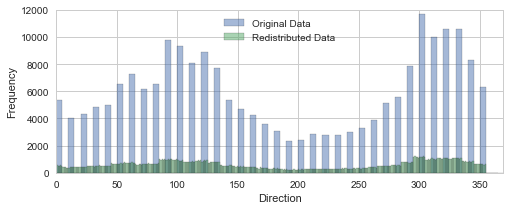

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


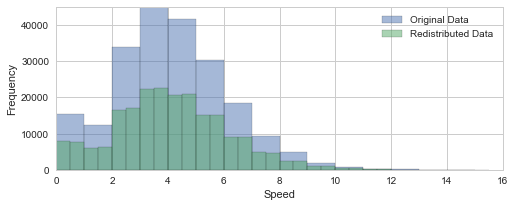

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? False
Report type used: FM-15
Sampling time used: [0, 30]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.364500e+04  43645.000000  43645.000000  43645.000000  43645.000000   
mean   2.012065e+07   1149.361897    184.850367      4.510202      6.525398   
std    1.413268e+04    692.143261    114.276828      1.987625      3.450254   
min    2.010010e+07      0.000000     -4.994456      0.000407      1.000000   
25%    2.011040e+07    500.000000     84.950130      3.143147      4.000000   
50%    2.012070e+07   1100.000000    167.663966      4.380892      7.000000   
75%    2.013093e+07   1700.000000    302.731900      5.743102     10.000000   
max    2.014123e+07   2300.000000    354.987094     15.543195     12.000000   

       dir_windrose             x             y  
count  43645.000000  43645.000000  43645.000000  
mean     212.598350      1.026241      0.399221  
std      239.640963      3.023937      3.733131  
min        0.000000    -12.352022    -11.404083  
25%       80.000000     -0.927227     -2.424296  
50%      140.000000      1.382454      0.059308  
75%      280.000000      3.320196      3.333982  
max      999.000000     15.541610     14.199063

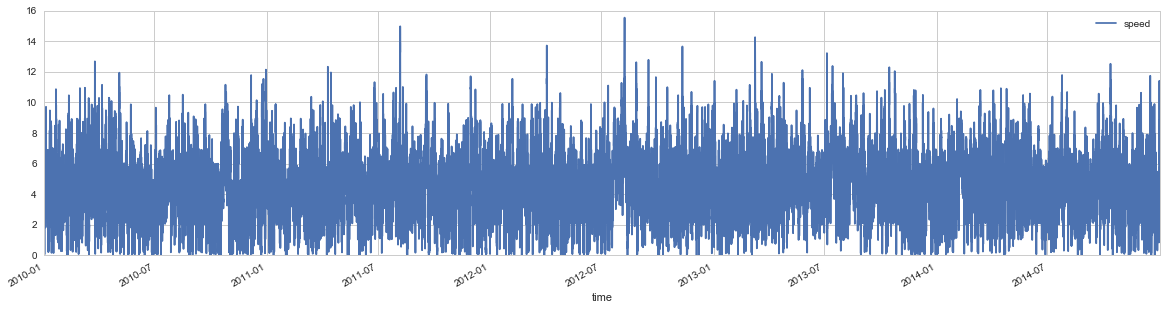

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

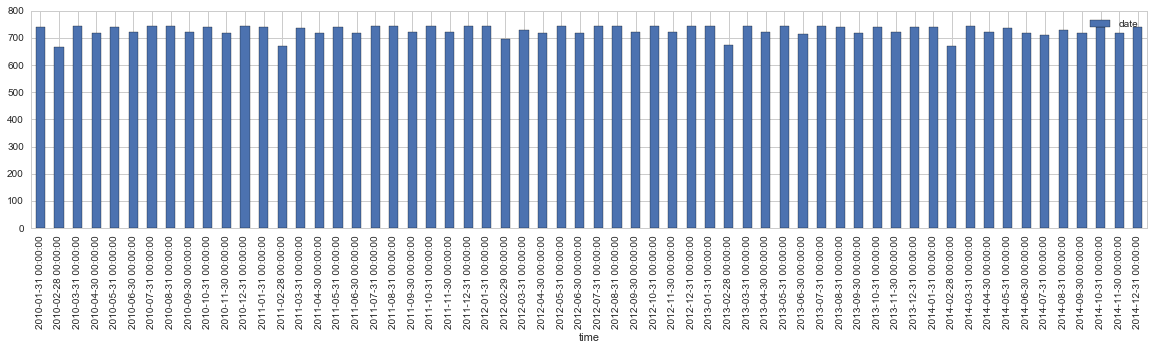

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


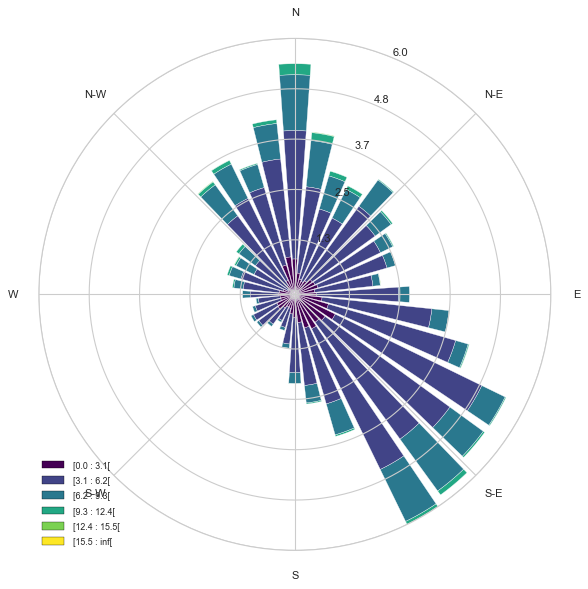

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcVPX+x/EXMzCKgIgiuBtiuJIIKq64hZXlCgqKYqlp
aXn1p+VSFooLZVZXc8mka2kmydUUc8kFl9wd46rhkrhULkAgygzgAHN+f3iZKwKj4MwcGL7Px4PH
g5nv+c55cwY+nDPne77HRpIkCUEQBBNSyB1AEATrIwqLIAgmJwqLIAgmJwqLIAgmJwqLIAgmJwqL
IAgmZyt3gKelVqvljiAIlZafn1+xz1f4wgIl/3CWplarRZZymgNElpKUNYuxf+riUEgQBJMThUUQ
BJMThUUQBJMThUUQBJMThUUQBJMThUUQBJMThUUQBJMThUUQyplRo0Zx5swZAHQ6HX5+fqxevdrQ
PnLkSM6fP1+k38GDB4mJieGvv/5i6NChT7y+N9980/C6SUlJT5n+AVFYBKGc6dKlC6dOnQIeDELr
2rUrBw4cAOD+/fvcuHGD5s2bF+kXEBBASEiIRbOWxCpG3gqCubzzzjts3LjRpK85ZMgQQkNDS2zv
3Lkzy5cvZ/To0Rw4cIAhQ4bwySefkJmZyW+//UaHDh04efIkn332GUqlkoYNGzJ37lzi4uK4cuUK
oaGhpKen88Ybb5CWlkaPHj2YOHEiM2bMoG/fvgQEBHDw4EG2b99OVFSUSX+2AmKPRRDKmZYtW3Ll
yhUkSeLkyZN06NCBTp06ceTIEU6cOEHXrl2ZPXs2X3zxBevWrcPd3Z3NmzcXeo2srCwWLVrEhg0b
OHToEBcuXLDozyD2WATBiEWLFrFo0SKTv67R62wUCpo3b87BgwepXbs2KpWKgIAA9u/fz4ULFwgL
C2P27NlMnjwZgJycHDp37kzjxo0Nr9G8eXOcnJwA8Pb25urVq4XWYe6prkVhKcf0ej137twpc1+h
4urSpQtffvklL7/8MvDgQtvly5cD4OLiQp06dVi+fDlOTk7s3buXatWqcevWLUP/pKQktFotVapU
4cyZM4SEhHD06FFSU1MBSExMNGt+sxUWvV5PREQEFy9eRKVSMW/evEIVddu2bXzzzTcolUq8vLyI
iIgAMNqnoiprgUhPT2froSQcnZxL1U+ruUebRuJ/RkXWuXNn3n//fT7++GMAVCoVTk5OtGjRAoVC
wXvvvce4ceOQJAkHBwc+/vjjQoXF2dmZKVOmkJ6eTt++fWnatClDhgxh1qxZxMXF8cwzz5g1v9l+
+/bs2YNOpyMmJoaEhASioqJYsWIF8GDX7fPPPycuLg57e3v+7//+j/j4ePLz80vsU5HduXOHb7ae
wsGxeqn6pdz+CyfnWjhVdynDWrPK0EcoL+rXr8/FixcLPVewxwLQtWtXunbtWqh98ODBhu+3bt1a
5DW9vb2Ji4sr8nzB39jatWufKvPDzFZY1Go13bp1A8DHx4dz584Z2lQqFRs2bMDe3h6AvLw8qlSp
wqFDh0rsU9E5OFYvdYHQZN41UxpBMC+zFRaNRoOjo6PhsVKpJC8vD1tbWxQKBa6ursCDKpmVlUWX
Ll3YsWNHiX2MKU+zyBWXJSMjg9u375GpyS7Va6WmpKBUqsjLL10GreYuTWtWLzfbpbzkAJGlJKbO
YrbC4ujoiFarNTzW6/WFCoRer2fRokVcvXqVpUuXYmNj89g+JSnvM3GlpaVxOf1SqfdYbCQdSlsV
bu71StUv8549kFUutos1zJRmDtaQRZYZ5Hx9fTl48CAACQkJeHl5FWr/4IMPuH//PsuXLzccEj2u
jyAIFYPZ9lgCAwM5fPgwoaGhSJLEggULiIuLIysri9atWxMbG0u7du0YNWoUAOHh4cX2EQSh4jFb
YVEoFMydO7fQc56enobvSxoJ+GgfQZDT04wlKomLS1nO8lUsYrCDIBhR1qECJdFq7jGqf7vHLnf8
+HEmT55M06ZNkSSJvLw8wsPD6du3b7HL37x5kwsXLtCrVy+T5HxaorCUYznZWjZ8HYlLzdoEh0/C
1a10H+IKplGWoQKm0LFjRz777DMAtFotI0eOxMPDgxYtWhRZ9tixY1y5ckUUFsG4nGwtqz//gGuX
Hwy9PnZwJy8HvUa/oWOpau8gczrB0hwcHAgJCWH79u2sW7eO27dvk5KSQq9evZg0aRKrVq0iJyeH
tm3b4uTkxBdffIEkSWi1WhYvXoyHh4dF84qrm8uh+znZfPLhBK5dTqStf0/GT12Io5MzP36/kqlj
XuLAz5vFtUCVUK1atUhMTMTHx4fo6GhiY2PZsGEDSqWScePG8corr9C7d29+//13Fi1axNq1a+nT
pw87d+60eFaxx1LO6HT3+XTuW5w/cwJv3y6EjZtB3fqN6NCtD9s2RvNT7Nes+nQWP29dx4jxM2jh
3V7uyIKF3Lx5k7Zt23L27FmOHTuGo6MjOp2uyHLu7u7Mnz+fatWqkZycjK+vr8Wzij2WciQvV8c/
5/2Dc6eP0Na/B2Hjp6P87wDBqlWrETzybT5ZvZ0uPftx7XIi894J5/N5/yDl1p8yJxfMTaPRsHHj
RpycnHBycmLx4sWMHj2anJwcJElCoVAY9mJnz57NggULiIqKws3NzexTJBRH7LGUE3l5uSxdOJWE
Ewfw9u3CpPc+Jy31VpHlatWuy4TpH9NnQBjrvozi5C8/8+vxeF4YMJKBw96gmoOTDOmtm1ZzT5bX
OnbsGCNHjkShUJCfn8/bb7+Nh4cHU6dOJSEhAZVKRePGjUlJScHLy4sVK1bQqlUr+vfvT1hYGPb2
9ri6upKSkmKy/E9KFJZyID8/jxWLpnPqyB5atvHn/z78ApWqitE+TZu34cNP13PswHa+/3oxP8V+
zaHdPxLy2hT8Ove2UHLr5+Li8kSnh0v7mteuXTO6jL+/P0ePHi22rbgrl93d3dm1axeAYQ4XOYnC
IjO9Xs+qT9/j2IEdNGvlx9Q5y1FVqfpEfW1sbOjU42X8OvVm+6Y1bI35iq8+n42qalWaPt/WzMkr
B4VCQa1ateSOUeGIz1hkpNfriV7yIb/s3Ypn8+eYNnclVatWK/XrqKpUZeCwN4j4dD02Njb8+P2X
4qyRICtRWGQiSRLfrpjP/p2xPNO0JdPnfUU1B8fHdzSiUZNmdO3dnxvXLxMfH2+ipIJQeqKwyECS
JL776mN2x62nkUczZixYbbIh40Ej3kaptGXNmjXFnooUBEsQhcXCJEnihzWfs2PTGuo38mTGwmiT
DhevXac+AYEDuXXrFtHR0SZ7XUEoDVFYLOzYge1sjVlFnfqNmbnwa5xrmP6DwZcGv0rVqlWZO3du
oYmzBMFSRGGxsO2bvsHGxoZ35q7EpZabWdZRvUZNgoODuX37NkuWLDHLOgTBGFFYLCjp4lmuXDpL
2w49qFP/GbOuKzg4mJo1a/LRRx+Rnp5u1nUJwqNEYbGg3XHrAQjsN9zs63J0dGTWrFncvXvXcG8a
QbAUUVgsRHMvg2MHtuNerxGtfTtbZJ0TJkygQYMG/POf/+TGjRsWWacggCgsFnM4fhu5uToCXxmG
QmGZzW5vb09ERAQ5OTlERkZaZJ2CAKKwWER+fj6Hdv+IqkpVAgIHWXTdo0aNolmzZqxevZrff//d
ousWKi9RWCxg7969/J1yk849X8GhlPdhLgu9Xs/du3dJS0vj7t27TJ8+nfz8fKZPn05aWprRL3Ep
gGAK4iJEC/j6668By3xoC5ClzeTQn+mk5l8CQHJoRqMmzdm8eTMtOvankUezYvsVTPQsLroTnpbY
YzGzpKQk9u7dS5Nm3jzjWXQSZHOxr+aIU3UXnKq7UN25JmFj3wFg28avDc8/+mWqywoEQRQWM1ux
YgWSJNHjhSB

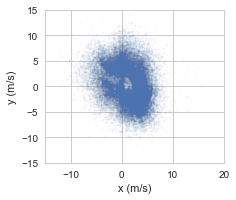

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAET5JREFUeJzt3XtMU/f7B/B3uVT5Urk4BM0mm8gQb1y8McLAqSEsIygg
IiDsF3FOjGa6xQm6gRdQUaOJMSAqMl11ij+FzURnNt3EzdsUcIp4Kw7cptxvLRSQ9vP9wy8nVkrb
A5Xa8rwSE3vOc8rzaX17Ts85fCpgjDEQQnRmZugGCDE2FBpCeKLQEMIThYYQnig0hPBEoSGEJ5MK
zbNnz7Bx40b4+PjAx8cH27Ztg0Kh0Fs9AMhkMoSEhKCxsbHHmpSUFIwZM0blz8aNG3usf/jwIRYs
WABPT08EBwfj4sWL2gerxaJFi7r1cODAgR7rb9y4gbCwMHh4eGDu3Lm4ffs2t+6nn37CmjVrePcQ
FBTUrYezZ892q3vw4AEmTJiAa9euqX0ebev7HTMh6enpLDAwkBUXF7NLly4xPz8/lpGRobd6xhhL
TU1lWVlZGmuioqJYZmYmq66u5v5IpVK1tXK5nAUEBLDk5GQmkUhYRkYGmzhxIisvL9c+YA38/f1Z
fn6+Sg+tra1qaysrK5m3tzfbtWsXk0gkbP369czHx4c1NTVxNXPnzmXXrl3T+ee3t7ezsWPHsitX
rqj00N7erlLX2dnJwsPDmZubG7t69Wq359G23hBMJjRtbW3M09OTnTt3jluWl5fHfH19mUKh6HM9
Y4xVV1czLy8v1tjYqLGXadOmsYKCAp36zs/PZ76+vqyjo4NbFhsby9LT03XaXh2pVMrc3NyYRCLR
qX737t0sNDSUe6xUKtmsWbOYWCxW6TM2NlbnHu7evcvGjBnTY1C77Nmzhy1YsKDHUGhbbwgmc3h2
9+5dyOVyTJs2jVs2ZcoU1NXV4fHjx32uB4Dc3Fx4e3vD1ta2xz5qamrQ2NiIUaNG6dR3UVERvL29
YWlpyS2bOnUqiouLddpeHYlEAgsLCzg7O+tUX1xcjKlTp3KPBQIBJk+erNLDjBkzUFxcjPv37+v0
nGVlZRgxYgSsrKx6rHn48CEOHTqEDRs29Gq9oZhMaKqqqmBlZYUhQ4Zwy4YNGwYAqKys7HM9AFy4
cAH+/v4a+5BIJBAIBNi/fz+mT5+Ojz76CDk5OVAqlWrrq6ur4ejoqLLMwcEBVVVVGn+Oth5EIhGS
kpLw/vvvY86cOcjPz++xXpcebG1tMXHiRBQUFOjcg1AoREJCAvz8/BAZGamyrUKhQFJSElasWIHh
w4d3217bekMymdDI5XIMGjRIZZlQKAQAdHR09LleoVCgtLQUrq6uGvt49OgRzMzM4OzsjH379iE+
Ph4ZGRnIzs7m1be6HnRVVlaGtrY2+Pr6Ijs7G6GhoUhOTsbp06f71IOrqytKSkp07qGpqQnh4eHI
zs6Gr68vEhISUFRUBADIzs6GSCTC/Pnz1W6vbb0hWRi6AX0ZPHhwtze567G6QwS+9Y2NjVAoFLC3
t+eWffLJJygsLOQenz59GjExMQgODoadnR0AYMyYMWhqasLBgwfx6aef6tzH4MGD1Y4zODgYT548
4R6rO4xbtWoVEhISuMNId3d3/P333xCLxQgODu51D3Z2dnj06JHavl62Y8cOtLe3QyQSAQDGjh2L
e/fu4ciRI7CxsUFOTg5OnDgBgUDQbVuJRKJxvaGZTGiGDx+O1tZWyGQy7o2qqakBADg5OfW5vuvN
e/Ewa9OmTWhra+MeOzo6QiAQcIHp4urqitraWigUCpibm6usc3Jy4n5ul5qaGrU9AMC+ffvQ2dmp
dl0Xc3Pzbp+7Ro8ejQsXLqit17UHhUIBMzPdDk4sLS1VPqd19XD79m2cPXsWUqkUs2fPVlm/ePFi
hIaGwtHRUeN6Tafv+4PJhMbd3R1WVlYoLCzE9OnTATy/9uDg4KD2AzHfent7e1hYWKChoYFbpu4f
9qZNmyCRSPDNN99wy0pKSvDOO+90CwwAeHt7Y8eOHejs7ISFhQXXh7e3t9pxvvnmm5peBgDA8uXL
YWtri02bNnHL7ty5AxcXF7X13t7eKoFijKGoqAjx8fEqdQ0NDdznPm3Cw8Mxc+ZMLF++vFsPsbGx
CAkJ4ZbL5XLMmTMHaWlp8PPzg7m5ucb1Bmfo03f6lJqaymbOnMlu3LjBLl++zPz8/FSuqTQ0NLCG
hgad618WERHB9u7dq7GHq1evMnd3d7Z3715WUVHB8vPzmZeXF/vhhx8YY8+vO1RXVzO5XM4YY0wm
kzE/Pz+WlJTEJBIJy8zMZB4eHuzx48e9fh3y8/PZuHHj2IkTJ1hFRQU7ePAgGz9+PLt+/Tpj7Pk1
lBevmTx9+pR5enqyHTt2MIlEwjZs2MDee+891tzcrPK8YWFhLCcnhzH2/PpSdXU16+zsVNvD7t27
2aRJk9jPP//M/vrrL7Zz584erz/JZDKNp5S1re9vAsYM90toL34e0IeOjg4cOnQIV69ehaWlJQIC
AhAVFcUdUqSmpgIAkpOTdap/WV5eHh4+fIjExESNffzxxx/Iy8vD06dPYW9vj5CQEMyaNQvA88Oe
FStWYMmSJdwerry8HDk5OaioqICTkxNiY2Ph4eHRp9fi3Llz+PHHH1FbWwsnJyfMmzePO61cWlqK
tLQ0fP311xg3bhyA53vDb7/9FlVVVXB2dsbChQtV9kytra1YsmQJtm3bhhEjRqCgoAB79+7Frl27
1O59lEolvv/+exQUFKCxsREjR45EbGws3N3du9W2tbUhPj5epR8+61+VyZMnq1+hS7KysrJYZGQk
CwsLY8ePH2fl5eUsKiqKRUdHs5SUFO5iYG5uLgsLC2Pz5s1jv/zyi9bnvXHjRl8C3+8qKyuZp6cn
q6mp0VhnbOPSxbFjx1hYWJjKssWLF2t9LYyBuvdL03uo9VPdtWvXUFxcjKNHj0IsFqOyshJbtmzB
ypUr8d1334ExhvPnz6OmpgZisRjHjh3DgQMHsHPnzj6dNn0dOTk5ISwsDLm5uYZupV8xxnD06FGE
hoZyy4qKimBmZgYHBwcDdmYYWkPz+++/w83NDcuWLUNCQgI++OAD3Llzh7uSHhAQgMuXL+PWrVvw
9vaGUCjEkCFD4OzsjHv37r3yAfS3L774AmfOnNF4w6apOXv2LNzc3DB+/HhumYeHB/bs2WPArgxH
69mzhoYGPHnyBFlZWfjnn3+wdOlSMMa4U7DW1taQSqWQyWQqV9etra0hk8m0NqDvzzX9YePGjSgr
K9NYY4zj6omjoyN3kdGUxvUiPuPSGho7Ozu4uLhAKBTCxcUFgwYNUrnNpKWlBTY2NhCJRGhpaVFZ
/mKIetLjhy0jVlhYSOMyIurGpSlEWg/PJk+ejN9++w2MMVRVVUEul8PX15f73YaLFy9iypQp8PDw
QGFhIdrb2yGVSlFWVgY3N7c+DoeQ14/WPc2MGTNw/fp1REREgDGGlJQUvPXWW0hOTsbOnTvh4uKC
oKAgmJubIy4uDjExMWCM4fPPP+92PxMhpkCnOwJWr17dbdnhw4e7LYuMjERkZGTfuyLkNWYydzkT
0l8oNITwRKEhhCcKDSE8UWgI4YlCQwhPFBpCeKLQEMIThYYQnig0hPBEoSGEJwoNITxRaAjhiUJD
CE8UGkJ4otAQwhOFhhCeKDSE8KRTaOrq6jB9+nSUlZWhoqIC0dHRiImJwbp167hZ9I8fP47w8HBE
Rkbi119/faVNE2JIWkPz7NkzpKSkcN9VMlBn1ySki9bQbN26FVFRUdzXyw3k2TUJAbTMRpOXl4eh
Q4fC398f+/btAwC9zq4J0IyNxobGpSU0J0+ehEAgwJUrV3D37l0kJiaivr6eW9/X2TUBmmHTmAyk
cfV6hs0jR47

Wall time: 6.68 s


## 2.3 Overview by Month

In [41]:
%%time
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        title = 'Month: %s' % (month)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl0VPXZxz+zL5k9mcm+JySERQEFQRBEEFxRqbXV2tba
2sWlVru3FsXWavXVWrW11mpbte4LWqsIooiyK7IFErKvk8lkJpPZ9/ePOAMxCUngJgSb7zk5J7nL
796Z3O999ucRxePxOBOYwAROCohP9A1MYAITGD4mCDuBCZxEmCDsBCZwEmGCsBOYwEmECcJOYAIn
ESYIO4EJnESYIOz/ACYid18cTBB2DLB48WLKysq4++67B9zf2tpKWVkZZWVlOBwOQa+9fv16Vq1a
lfz7oYceYsaMGYJew+PxcPbZZ/P2228Luu4E+mOCsGMEkUjEunXrBty3du3aUbvuP//5Tzo6OkZt
fY/Hww9+8APa2tpG7RoTOIwJwo4RZsyYQUtLC5WVlf32vf3225SVlZ2Auzo+bN++ncsvv5yDBw+e
6Fv5n8EEYccIkydPJjc3t580bWtrY+/evSxfvrzfOevWrWPlypWceuqpLFy4kD/+8Y9EIpHk/sWL
F/O3v/2NVatWMXv2bGbOnMnPfvYzPB4PAFdffTXbt2/n/fffp6ysjJaWluS5//3vf1m2bBnTpk3j
sssu45NPPknua2lpoaysjIceeuion+n6669n0qRJPP7448f0nUxg5Jgg7Bji3HPP7acWr127llNO
OYWMjIw+259//nluuOEGpk+fzsMPP8zXvvY1nnjiCX7+85/3Oe6vf/0rPT093H///dx88828+eab
/OUvfwFg1apVVFRUMHPmTJ5//nksFgsAfr+fBx54gJtuuokHH3wQv9/PjTfemHwZWCwWnn/+eS6/
/PKjfp5nnnmGBx98EJPJdFzfywSGD+mJvoH/JSxfvpy///3v1NbWUlxcDPSqw+edd16f46LRKH/8
4x+54IILkg6j+fPno9VqWbVqFd/+9rcpLy8HICMjg/vvvx+RSMT8+fPZuHEjjz/+OLNnz2bhwoVo
NBrUajW33HIL//rXv4Ber/G9997LqaeeCkAkEuHGG2+kpqaG8vJy5HJ5ct/RMGnSJMG+mwkMDxMS
dgwxbdo0MjMzeeeddwBob29nz549LFu2rM9xdXV1OByOfmryBRdcAMDOnTv7rCkSiZJ/m81moFe6
ut3uAe9DIpEwffr05N/Z2dkAgx4/gfGDCcKOIUQiUR+1eO3atUyfPp3MzMw+x7lcLgBSU1P7bNdq
tcjl8qSNCqBSqfpdQyKRMH/+fH7/+98PeB8KhQKx+PC/PvF7LBY7xk82gbHCBGHHGOeeey779++n
paWFtWvX9lOHAQwGAwBdXV19tvf09BAKhZL7j4af//znbNmyhe7ubmFufALjAhOEHWPMnDkTs9nM
c889x+7du/upwwCFhYUYjcZ+iQj//e9/k2sMBY1Gw5133klDQ0Mfz/IETm5MOJ3GGGKxmKVLl/KP
f/wjadN+HhKJhBtuuIE777wTvV7POeecQ1VVFQ899BDLly8ftrNn/vz5mM1mdu3ahUqlIhgMDuu8
UChEZWUlGRkZ/bzXEzixmJCwJwDnnnsu4XB4wNhrAl/72tf43e9+x7Zt2/je977HM888wzXXXMN9
9903omutXr0av9+P3W6npqZmWOfYbDauuOIKXnzxxRFdawKjD9FET6cvFlpaWvj617/Ohg0bkts+
/PBDrr32Wt59911ycnJO4N1N4HgxQdgJTOAkwoRKPIEJnESYIOwEJnASYYKwE5jASYSJsM4XALFY
jGg0muwsEY/Hk7+LRKI+PxKJpE8q44nAY489xssvv4xcLuf888/n+9//fnJfR0cH1113XfJvr9dL
R0cH27ZtQ61Wn4jbHVeYIOw4RjweJxwOEwqFCIfDyZ9gMHh4WyRMPDYyv6FEIkYmkyOTyZDL5cjl
vb8nfhQKBVLp6Dwamzdv5vXXX+ell15CrVZz/fXX884773DuuecCkJ6ezpo1a4Dez//tb3+b73zn
OxNk/QwThB0niMfjhEIhfD4fXq8Xr9eLz+cjFoshFouTP1KpFKlUikqlQq/Xc9C3nR3utQRwEyJA
nCiIQRqXc3HkJ7wuvZdIPIQEGXJUqNGz2PRVDBILoVAoec1IJEIsFiMWixGPx5HJZKjV6mS1j1qt
FoTElZWVLFiwAK1WC8CCBQtYv359krBH4o033iASiXDFFVcc93W/KJgg7AlCJBLB7Xb3I6dUKkUm
k6FSqUhNTUWv1yOTyQZdp6ojjMtrPfrFxBAljJ8wfnpQGxRk67IHPDQej+P3+3G5XHi9Xux2O+Fw
mFgs1ofEKSkpaDSaEavXU6ZM4a677uK73/0uKpWKDRs2DNgkLhaL8cgjj4w4UeSLjgnCjiGCwSDd
3d04nU68Xi8SiSRJArPZjF6vRyKRjGhNjdRAnrqcFIkBpUSPTKRGIlIgiUmgE2YbLyMs8hOKefBH
nXgi3SgkqkHXE4lESYl6JEKhEE6nk56eHjo7O2lra0MkEqHX6zEYDMO+97lz53LZZZdx9dVXYzAY
mDt3Lrt37+533ObNm7FYLEybNm1E38cXHROEHUXE43F8Ph9Op5Pu7m6CwSAymQyNRkN2dnZSLTwe
uIN5vN9UjiPoxxcJEYz6icSjyBHzSF4Bd33STlQESokUtdSCRVnEuenGEV9HLpeTnp5Oeno60CsB
HQ4HXV1dNDU1EY1GSUlJwWQyodfrUSgUA67j8XhYunQp11xzDQBPPvkkubm5/Y5bv349F1544Yjv
84uOCcIKjHg8nlQlu7u7icViKBQKDAYD6enpR1VvjwW+SITtnc39tqtEvdLOFfLjj0eT26tcncjF
x38PYrGYtLQ00tLSgF5vrs1mw2q10tzcjEKhwGg0YjabkcvlyfNaW1v58Y9/zCuvvEIgEODFF1/k
zjvv7Lf+xx9/zDe+8Y3jvs8vGiYIKxCi0ShOp5OOjg6CwSAKhYKMjAwsFkufYnGhoZbKhz7oCMjF
ElQjPGc4SElJobCwEOhV/Ts6Oujq6sJqtaLX67FYLGi1WsrKyrjwwgtZsWIF0WiUb37zm8yaNYtf
/epXLF68mHPOOQeA5uZmsrKyBL/Pkx0TucTHiUAggM1mw263IxaLMRgMZGdnCy5JB8M2WyNXvvd0
v+0qkYR/Fi/lG7Xr+khYi1LDuvO/h0Y2sMoqNDweD62trXi9XqRSKenp6aSmpo5a2OiLjolv7RgQ
j8fp7u6mo6MDr9eLUqkkPz8fk8k05kkJKSOUlgaFasRS+Xig0WgoKysjGo3S3t6O1WqltbUVk8mE
xWKZiK+OEBOEHQHi8TgOh4PW1lai0SgajYYpU6agVCpP2D2NlHzZah3iE5DpJJFIyMnJIScnB6fT
SVtbGwcOHECj0ZCTk0NKSsqY39PJiAnCDgPxeJyenh6am5sJh8MYjUZyc3NHHIIZDaikMiQiEdFh
WjYZav0o39HQMBqNGI1G/H4/jY2NHDx4MGlKnMiX38mACcIOAY/HQ3NzM36/H4PBQH5+/rggagJq
qQy9XIUj6BvW8Xr5+CGESqWivLwcv99PfX09+/fvJzU1laysrD6e5QkcxgRhB4Hf76elpQW3241W
q2XatGlj5kgaCdRSOXq5ctiEVUvH32dQqVRUVFTg8XhoaGhg3759WCwWMjIyJpxTn8PEt/E5RCIR
mpubcTgcqNVqJk+e3K/373iCTCwhQ6Wj3j28MZUjdVKNJTQaDVOnTsXhcNDS0kJnZyeZmZmkp6ef
8Aqj8YIJwh4Bp9NJY2MjYrGY0tJSdDrdib6lYSFLPfz7HM+ETcBkMmEymWhra6O9vR2Hw0FRUdGE
fcsEYYFeqdr

Wall time: 19.6 s


# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

0.6
Wall time: 0 ns


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.6 289
[  9.83705885e-08   7.38769104e-07   1.09215802e-06   1.13530776e-05
   2.82155609e-05]


In [48]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQa2d9Jvwc7Uu3et/37muMFwzYxs6EOP5ywWVwIBkw
wYEJM2agkiGEneAde2zfYCCY+hKIC8wA9V27sP05pLAH5qtKwECRhMXcmCS2IbjVtxd1a2lJrdYu
neX7o/0799XRWaWjbql9nqpb9r396tV71Oc8+q3Pj5MkSYIDBw4cHFO4jvoADhw4cNBJOCTnwIGD
Yw2H5Bw4cHCs4ZCcAwcOjjUcknPgwMGxhkNyDhw4ONZwSM6BAwfHGg7JOXDg4FjDITkHDhwcazgk
58CBg2MNh+QcOHBwrOGQnAMHDo41HJJz4MDBsYZDcg4cODjWcEjOgQMHxxoOyTlw4OBYwyE5Bw4c
HGs4JOfAgYNjDYfkHDhwcKzhkJwDBw6ONRySc+DAwbGGQ3IOHDg41nBIzoEDB8caDsk5cODgWMMh
OQcOHBxreI76AA6OHpIkoVarged5uN1ueL1euFwucBx31Edz4KBtcJIkSUd9CAdHh2q1ilwuh/7+
ftTrdQDA9vY2hoaG0N/fD5fL5ZCeg56GY8m9hCEIAsrlMlKpFMLhMHieh9frhSRJkCQJgiCA53nU
ajVwHAe32+2QnoOeg0NyL0FIkgSe5yEIAjiOgyAIWF1dhSAI8Hg8EEURpVIJfr8fHs+5W4RIr1qt
wuVywe12w+12w+PxOKTnoGvhuKsvMYiiiHq9Dvq17+zsIJPJYH5+Hj6fD7VaDfF4HBzHoV6vw+Px
IBQKIRgMIhQKwe12N+xH+3AcJ5Odx+NpWufAwVHBseReIiD3UxAEAADP89ja2oIoivB6vejv70et
VkMgEIDX68XAwADC4TCq1SpKpRJyuRwSiYRMekR8LJnxPA9JklCtVpFMJjExMQGfz+eQnoMjhUNy
LwGIogie5yGKIjiOQz6fRywWw/DwMCKRCDY2NhrWcxwHSZLAcRwCgQACgQCGh4chSRIqlQrK5TL2
9vYQj8fh9XplwmNJr1gsolaryaRH7q1j6Tk4bDgkd8xBcTRKJsTjcezv72Nubk621MxGLDiOk8mM
Jb1SqYS9vT3s7OzA5/MhFApBkiSZVIFzcUCH9BwcNhySO6YQRRGCIEAURQBArVbD5uYmfD4fVlZW
5IRCO8kClvToPcnSE0URm5ub8Pv9cjwvGAzC5TqoP3dIz8FhwSG5YwhRFLG7u4tcLof5+Xlks1nE
43GMj49jeHi4idiUlhy5q1bhcrnkeN3+/j6mpqbkTG0mk0GlUoHf729wb/VIr1AoIBKJwO/3O6Tn
oGU4JHfMQO4pcEAcW1tbKJfLWFpaQiAQaFrfybIPl8uFQCCAUCgE4IB8y+UyyuUy0uk0qtUqAoGA
bOkFAoEG0ksmk/B4POB53rH0HLQMh+SOCZS1b/V6HYVCAYODg1hZWZHJQ+u1QGcJDzggvXA4jHA4
DOAc6ZVKJezu7sqkR5YeJT/IstRyb30+n1Oj50ATDskdAyhr33Z3d5FMJuHz+TAzM6P7WjVyaNVd
tQol6VEHBnVh8DyPeDyOcDgsW3pGiQzqvXVIzwHBIbkeB1lvwAFJxGIx8DyPyclJ7O/vm9qjW+rB
3W43+vr60NfXBwCIRqOIRCKo1WpIJpOo1+sNlp4a6dXrdVQqFZn0OI6D1+t13NuXMByS61Eo3dNC
oYCtrS0MDg5ifn4exWLRFHlpWTx2EF+7e3Ach1AohMHBQQDnLL1SqYREIgGe52XSC4VC8Pv9TaS3
s7Mj7+FYei9NOCTXg2Br3wAgkUggm81iZmYG/f398rpWScYOAugEiSgtPZ7nZdKLx+Pgeb6hXMXv
98tn0bL0HNI7/nBIrocgSRLS6TS8Xi8CgQDq9Tq2trbAcRxWVlbg9XrltWYf2sOKv3UCHo8H/f39
MrGzpLe3twdBEOSEi9/vb0hQsKRHMT0iPof0jhcckusRUGtWNpuV41SxWAyjo6MYHR1teijbJa9e
JD410tve3pb/KwhCg9gAS3qiKMoJHJb0PB4PPB6PQ3o9DIfkegCCIMiClgCQzWZRq9WwsLAg16C1
CiLDYrGIXC4ndy8cBxBBEfHV6/UGS08URZnwQqFQgwXHkl69Xkc+n8fExIRDej0Ih+S6GMrkQqVS
QaFQgN/vx4kTJ3QzhmYtOVqztbWFSCSCvb09lEoleDweCILQ1JnQy/B6vfB6vYhEIgCAer2OUqmE
crmMTCYDSZIaLD0iPZ7nUSqVZPeW4zjH0ushOCTXpWCVQwAgk8kgkUggEAhgYGDAsCTCDMnV63Vs
bm4CAJaXl+V/TyaT8vuynQlk8bClG70MkpQaGBiAJEkNll4mkwEABINBWUiUipOBRkvPIb3uhkNy
XQi29k0URWxvb6NSqWBpaUl++NoFK7dUKpXg9Xpll5jjOPh8PgwPD8tnoIdfWa+mLN2wE3aVsZg5
G12zz+drIL1SqYR8Po9qtYq1tTVVSw9wSK+b4ZBcF0HpnpZKJWxubqK/v19uzTLrhmqtkyQJiUQC
e3t7mJ2dRV9fH1KplO6eap0J5OYpSzcooE/v1S6OihxY0vN6vchkMpiYmECpVEKxWMTu7i5cLldD
yYoW6QEH5S/05dCpLwUH6nBIrkugrH1LpVLY3d3F9PQ0BgYGWtpTSTLknrpcLpw4caJhfgMLIyJ1
u91NWcxSqdQQ0JckCYVCQR5808sPtSRJco+sz+fD4OCgPMaxVCqhUCggmUzC7XY3kD1rwYmiiGQy
iXA4jP7+/oahQNSZ4aAzcEjuiEGZzZ2dHczPz0MQBFmWfGVlRbaKCFYsORbkno6MjDSVnLRbbuLx
eBCJRBoC+pubm6hUKsjlcnLnAmvxHBbMuqtWwXEc/H4//H4/hoaGGkgvn8/LpMdeNys4oGbp0VAg
h/TshUNyRwhKLtAELCKioaEhjI+Pt9U8T+vIPc3lcrIacKdB1sno6Cj8fr8c22ItHvbh17IouwVm
iFKN9KrVKsrlMvb395FIJGS1ZOBcQkPp3tZqNQBoGgrkkF7r6O676xiDdU9JGikWi8lxMi1YsbpE
UUQ0GoXb7W5QA9baU/lfO8DGtpRuHj38esNxugGtfBbsfAwivY2NDXg8nqahQOwkNCIzGjqknHnr
kJ51OCR3yFDTfdva2oIkSbpxMuUeRigUChBFEZFIRLUj4qigZvGww3HYORFk3bQDu9zVdvegjGsk
EpFnYNB153I5xONx+Hy+hkSGFunt7OxgamqqYRJat/x+uxEOyR0ilFOzcrkctre3MTw8LM84NYLR
zSyKouyechyHsbExU2c7qjYu5XAcmhNRKpUgiiI2NjY01YMPC52I61kZCsROQuM4DuVyWe6CcSw9
Yzgkd0hga98kScL29jaKxSIWFxflEgUz0HMlaViNx+PB8vIyXnjhBdN7Kv/ergUFtEacyjkRMzMz
cvY2lUqhVqs1WDu9VJisR5Z6Q4Gy2Sx2dnbkoUCUvabXAY57qweH5DoMtdaszc1NBINBrKyswO12
QxAES2MB1daSVTg2NoaRkRE56WDlnN34IGipB7OacsoaPfY6DrOg2M59WLIfGRlpsHAlScLZs2dV
hwKxpMfzvEN6cEiuo1A21qfTaSSTSUxOTmJoaEj+dyuBfuVaURQRj8eRz+ebGvat7Gk37CIFJfQ0
5dSa7ruJvNs5C0t6mUwGy8vLqFarKJVKhkOBAHXSq1ar6OvrO/YdGQ7JdQCSJEEQBDz77LM4ceIE
AGB7exu1Wg3Ly8uymCPBajaT1larVXmWqlHDvpk96UbvJY05pbySsume53mk02n09/fLrVhW0W1E
CTSSHqA9FEi

In [49]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [50]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [51]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.436   2.820  -2.551  1.886  2.226   0.048
2  0.285   1.572   3.919  2.351  2.397  -0.232
3  0.279  -2.327   1.408  2.231  3.010  -0.163

GMM Plot Result
0.435546471796 [[ 2.82015623 -2.55132775]] [ 1.87868027  2.23274383] 171.956143123
0.285029292232 [[ 1.57242541  3.91861688]] [ 2.08008412  2.63576577] -137.420799853
0.279424235972 [[-2.32712656  1.40833161]] [ 2.16814412  3.0556343 ] -165.908354837


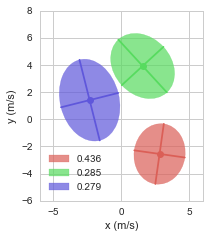

In [52]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUK3d9J/op7Wp1q/d9777GeGHx9ZYMOB48OAYHkhDz
7JBzOM8cJ5MQBsJug9eHfYMN2GRe4DjBPOCM7Ynt+AwPHDhMWAx+IWAwd5wDXsjcVner1d1aWltr
l2p5f7S/1aVS7Sp1S5f6nONzfa+qfvqVVPXRd/18GUEQBDhw4MDBWQrXcW/AgQMHDjoJh+QcOHBw
VsMhOQcOHJzVcEjOgQMHZzUcknPgwMFZDYfkHDhwcFbDITkHDhyc1XBIzoEDB2c1HJJz4MDBWQ2H
5Bw4cHBWwyE5Bw4cnNVwSM6BAwdnNRySc+DAwVkNh+QcOHBwVsMhOQcOHJzVcEjOgQMHZzUcknPg
wMFZDYfkHDhwcFbDITkHDhyc1XBIzoEDB2c1HJJz4MDBWQ2H5Bw4cHBWwyE5Bw4cnNVwSM6BAwdn
NRySc+DAwVkNz3FvwMHxQxAE1Ot1sCwLt9sNr9cLl8sFhmGOe2sOHLQNRhAE4bg34eD4UKvVkM/n
MTAwgEajAQDY2dnB8PAwBgYG4HK5HNJz0NNwLLnfYHAch0qlglQqhVAoBJZl4fV6IQgCBEEAx3Fg
WRb1eh0Mw8Dtdjuk56Dn4JDcbyAEQQDLsuA4DgzDgOM4rK2tgeM4eDwe8DyPcrkMv98Pj+fwFiHS
q9VqcLlccLvdcLvd8Hg8Duk56Fo47upvGHieR6PRAH3tu7u7yGQyWFhYgM/nQ71eRzweB8MwaDQa
8Hg86OvrQzAYRF9fH9xud9N6tA7DMCLZeTyeluMcODguOJbcbwjI/eQ4DgDAsixisRh4nofX68XA
wADq9ToCgQC8Xi8GBwcRCoVQq9VQLpeRz+eRSCRE0iPik5IZy7IQBAG1Wg3JZBKTk5Pw+XwO6Tk4
Vjgk9xsAnufBsix4ngfDMCgUCtje3sbIyAjC4TCi0WjT8QzDQBAEMAyDQCCAQCCAkZERCIKAarWK
SqWCXC6HeDwOr9crEp6U9EqlEur1ukh65N46lp6Do4ZDcmc5KI5GyYR4PI79/X3Mz8+LlprRiAXD
MCKZSUmvXC4jl8thd3cXPp8PfX19EARBJFXgMA7okJ6Do4ZDcmcpeJ4Hx3HgeR4AUK/XsbW1BZ/P
h9XVVTGh0E6yQEp69J5k6fE8j62tLfj9fjGeFwwG4XId1J87pOfgqOCQ3FkInuext7eHfD6PhYUF
ZLNZxONxTExMYGRkpIXY5JYcuatm4XK5xHjd/v4+pqenxUxtJpNBtVqF3+9vcm+1SK9YLCIcDsPv
9zuk58AyHJI7y0DuKXBAHLFYDJVKBcvLywgEAi3Hd7Lsw+VyIRAIoK+vD8AB+VYqFVQqFaTTadRq
NQQCAdHSCwQCTaSXTCbh8XjAsqxj6TmwDIfkzhLIa98ajQaKxSKGhoawuroqkofauUBnCQ84IL1Q
KIRQKATgkPTK5TL29vZE0iNLj5IfZFmqubc+n8+p0XOgCofkzgLIa9/29vaQTCbh8/kwOzurea4S
OVh1V81CTnrUgUFdGCzLIh6PIxQKiZaeXiKDem8d0nNAcEiux0HWG3BAEtvb22BZFlNTU9jf3ze0
RrfUg7vdbvT396O/vx8AEIlEEA6HUa/XkUwm0Wg0miw9JdJrNBqoVqsi6TEMA6/X67i3v8FwSK5H
IXdPi8UiYrEYhoaGsLCwgFKpZIi81CweO4iv3TUYhkFfXx+GhoYAHFp65XIZiUQCLMuKpNfX1we/
399Ceru7u+IajqX3mwmH5HoQ0to3AEgkEshms5idncXAwIB4nFWSsYMAOkEickuPZVmR9OLxOFiW
bSpX8fv94l7ULD2H9M5+OCTXQxAEAel0Gl6vF4FAAI1GA7FYDAzDYHV1FV6vVzzW6EN7VPG3TsDj
8WBgYEAkdinp5XI5cBwnJlz8fn9TgkJKehTTI+JzSO/sgkNyPQJqzcpms2Kcant7G2NjYxgbG2t5
KNslr14kPiXS29nZEf/kOK5JbEBKejzPiwkcKel5PB54PB6H9HoYDsn1ADiOEwUtASCbzaJer2Nx
cVGsQbMKIsNSqYR8Pi92L5wNIIIi4ms0Gk2WHs/zIuH19fU1WXBS0ms0GigUCpicnHRIrwfhkFwX
Q55cqFarKBaL8Pv9OHHihGbG0KglR8fEYjGEw2HkcjmUy2V4PB5wHNfSmdDL8Hq98Hq9CIfDAIBG
o4FyuYxKpYJMJgNBEJosPSI9lmVRLpdF95ZhGMfS6yE4JNelkCqHAEAmk0EikUAgEMDg4KBuSYQR
kms0Gtja2gIArKysiP+eTCbF95V2JpDFIy3d6GWQpNTg4CAEQWiy9DKZDAAgGAyKQqJUnAw0W3oO
6XU3HJLrQkhr33iex87ODqrVKpaXl8WHr11I5ZbK5TK8Xq/oEjMMA5/Ph5GREXEP9PDL69XkpRt2
wq4yFiN7o2v2+XxNpFcul1EoFFCr1bC+vq5o6QEO6XUzHJLrIsjd03K5jK2tLQwMDIitWUbdULXj
BEFAIpFALpfD3Nwc+vv7kUqlNNdU6kwgN09eukEBfXqvdnFc5CAlPa/Xi0wmg8nJSZTLZZRKJezt
7cHlcjWVrKiRHnBQ/kI/Dp36UXCgDIfkugTy2rdUKoW9vT3MzMxgcHDQ0ppykiH31OVy4cSJE03z
G6TQI1K3292SxSyXy00BfUEQUCwWxcE3vfxQC4Ig9sj6fD4MDQ2JYxzL5TKKxSKSySTcbncT2Ust
OJ7nkUwmEQqFMDAw0DQUiDozHHQGDskdMyizubu7i4WFBXAcJ8qSr66uilYRwYwlJwW5p6Ojoy0l
J+2Wm3g8HoTD4aaA/tbWFqrVKvL5vNi5ILV4jgpG3VWzYBgGfr8ffr8fw8PDTaRXKBRE0pNet1Rw
QMnSo6FADunZC4fkjhGUXKAJWEREw8PDmJiYaKt5no4j9zSfz4tqwJ0GWSdjY2Pw+/1ibEtq8Ugf
fjWLsltghCiVSK9Wq6FSqWB/fx+JREJUSwYOExpy97ZerwNAy1Agh/Sso7vvrrMYUveUpJG2t7fF
OJkazFhdPM8jEonA7XY3qQGrrSn/0w5IY1tyN48efq3hON0AK5+FdD4GkV40GoXH42kZCiSdhEZk
RkOH5DNvHdIzD4fkjhhKum+xWAyCIGjGyeRr6KFYLILneYTDYcWOiOOCksUjHY4jnRNB1k07sMtd
bXcNyriGw2FxBgZddz6fRzweh8/na0pkqJHe7u4upqenmyahdcv3241wSO4IIZ+alc/nsbOzg5GR
EXHGqR70bmae50X3lGEYjI+PG9rbcbVxyYfj0JyIcrkMnucRjUZV1YOPCp2I65kZCiSdhMYwDCqV
itgF41h6+nBI7oggrX0TBAE7OzsolUpYWloSSxSMQMuVpGE1Ho8HKysrOHPmjOE15X9v14ICrBGn
fE7E7OysmL1NpVKo1+tN1k4vFSZrkaXWUKBsNovd3V1xKBBlr+k8wHFvteCQXIeh1Jq1tbWFYDCI
1dVVuN1ucBxnaiyg0rFkFY6Pj2N0dFRMOpjZZzc+CGrqwVJNOXmNnvQ6jrKg2M51pGQ/OjraZOEK
goCNjQ3FoUBS0mNZ1iE9OCTXUcgb69PpNJLJJKampjA8PCz+u5lAv/xYnucRj8dRKBRaGvbNrGk3
7CIFObQ05ZSa7ruJvNvZi5T0MpkMVlZWUKvVUC6XdYcCAcqkV6vV0N/ff9Z3ZDgk1wEIggCO4/DC
Cy/gxIkTAICdnR3U63WsrKyIYo4Es9lMOrZWq4mzVPUa9o2sSTd6L2nMyeWV5E33LMsinU5jYGBA
bMUyi24jSqC

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QVNf5x7/LLguEXSVG3hQBRckPLYnxLUnTYkOqaRyT
hqEECCGTCaOtrWkSrWNsFJ1EhcY2/aMYbeykKuqImj+ibccmlajTZGJEiyHhzYAsIgpoQrKLhJdl
f3+Qe7l7uffcl7179y6cz8zOrPftnF357vOc5zznPCaPx+MBhUIxHCGB7gCFQhGGipNCMShUnBSK
QaHipFAMChUnhWJQqDgpFINiCXQHpLhw4UKgu0AxOPPnzyee/1/1KQy5owTPWa1WpKen+6NbPmN4
cQLAka1n/fp8p8sJu83u1zZINH7Vy75PSZ9GvNbpdMJul9fXppqr7PvUSRHqOqcSvb7TpzZmSF4z
5I5CbGKJ4LmO1g1ad0kzgkKcYxlGmFKiVAPzzKaaq2w7eouUoh465gwg/hQml5T0aWwbjV/1ellq
inGh4gwAXIH4W5hc+CKlGBsqTp3hilJPYXKhVjQ4oOLUkUBYSzGoFTU+VJw6ECg3Vg7UihoXGq31
E/w/dF9EWeP8mn0/6HbD4hxk/51uv1P1cxn4UV0a0TUGVJwaoqUgAW9RpsyKA+A9z9l0+YbXNYBv
YmWt6Pfzo1SkgYWKUwZK3D0t3FYhUQq2xTvHFauvIqVzo4GHilMCPceKckUpBnMPI1ItrCgVaeCg
ASECegmzxvk1apxfI2VWHPvyBeZ+5rk+PWucR3WHhoZQXFyM3NxcFBYWwuFweJ2vrKxEdnY2cnNz
ceTIEa9zly5dQmFhIfvvW7duYdWqVSgoKEBeXh5aW1uJbVPLKYKewgTUWUoSWlpRYPyOR//zn/+g
v78fFRUVqK6uRmlpKXbt2gUAGBgYQElJCY4dO4aIiAjk5+cjMzMTkydPxp49e3D8+HFERIx8Tzt2
7MDjjz+OZcuW4ZNPPkFzczMSExNF26aWUwA9hMm1aloLk4uWVhTAuLOiFy5cwI9//GMAwNy5c/H5
55+z55qampCYmIiJEyfCarVi/vz5OH/+PAAgMTERf/nLX7yedfHiRXR0dOC5557DiRMnsGjRImLb
VJw8Gr/q9Xv2DleUSoR5qacLlz09itvjtqOVQFPSpwXV3Oi53iTBlxQulws2m439t9lsxuDgIHuO
u0IoMjISLpcLAPDoo4/CYvF2TK9du4YJEyZg7969iI+Px549e4htU3F+D/OHZkRreamnC5d6upCa
FOP1b6VQK6ocm82Gnp6RH8ShoSFWdPxzPT09xOV8UVFRyMzMBABkZmZ6WWEhqDg5GM1ackXICDMh
xobUpBikJsWw55UIlW9FtQgYAWNXoPPmzcPZs8Priaurq5GamsqeS0lJgcPhQHd3N/r7+1FVVYX7
7rtP9Fnz58/HmTNnAADnz5/HzJkziW3TgBCAtl4TzGZtn8n/o1dqKRkYUQrBnGt0dLL33BsZLasN
fsAIUD83ysyLjkWWLFmCjz76CHl5efB4PNi+fTtOnDiB27dvIzc3F6+88gqKiorg8XiQnZ2N2NhY
0WetX78eGzduxOHDh2Gz2fCnP/2J2LbJ6Du+X7hwwe87IdR1uZA6N9nn5/giSECeKEk7DDQ6OgHI
FyiXpss3AKgXaBMviqvnTghS25RcuHABLdGHBM8ldz0teX+gGPeW01d3zNfEAQa++6oGdkyqQqSs
q6tSpNysovEyzeJvxr04ASA+5S7F9xhJlHxSk2JYV1epFfVFpGPZvQ0EARFnVlYWG55OSEhASYnw
5ktGQytBMigRZvVABwDAbXFjPqTdRV8ECgx/PjXj0ZT0aWisuYp4q+ImKTx0F2dfXx88Hg/Ky8v1
bnoUzNSJ0+kkXmcEUQJA2pQYOJ1OVDuHj80NFQ8+MM/3VaCAuiyjtl4T0mzS11HE0X0qpb6+Hr29
vXj++efx7LPPorq6Wu8uKEJtwoAYaoSZNiUGaVNGrmfeVw90eIlXCO7cqFqYzy536sVoC8qDFd0t
Z3h4OIqKipCTk4OWlhasWLECJ0+eHJVNwcXpIls2NbT1moaf/b3VFLOeg243pkydIGldpWAyexJi
hs0J6TM1WobPJUXZBPvmdDqRYB8Ouji6XbjgbkfqoLirG39XBNo6Xbj47Q3MMkWq/gwxcZFov/Yt
/td9EzPNYZLX13W5kBBh6MkAQ6O7OKdPn46kpCSYTCZMnz4dUVFR6OrqQnx8vOg9/gjJm/tHsoFI
GzVbnIOyN3Hmw7VWZpglrSVjBc0we1lKLvy+/sBuR117J5rMt4lubprNjkZHJ5rxnSoXl+Hu/7Oj
6fINtGCQ7OamAJ0t3bDbaORWLbq7tceOHUNpaSkAoKOjAy6XC9HR6v9YjAg/s4d5kRBzYeXAdXNJ
8NP/1Lq6Stz7sZo5pAe6W85f/OIX2LBhA/Lz82EymbB9+3aiSxssyM3q4cMP+KglbUoM6to7UT3Q
QbSg3L6pySxiSJkVh5rLN4jWk06t+IbuqrBarZJpS8GG2rlKrrWUosEzvDB3MNyNOSJTKYxA5cLt
L5O4ACgTqpwoLk1MUEfwm6wA429hMqKcHT183WfXr6PB04q7TcKLdNOmxKC6nWw9hVCTp8vMhRKv
MYj1bHa1CR5P1rcbiqDiJCB3xYY/3FhGlMCIMAFgus2Gq9/1EgXKtKNUoMBokcqxolrstOBvut0/
DHQXFEOXjElACn4oDajIDfpwrSVXmAzMMa6AucgNEJGQOz8qJzjELMymKIOKUyVKkwnkuLENnlY0
eFpFRclFb4GSRMokKFC0hYpTAqkxlVyUWEu5SF3rS/SXQc40kFyo9VTGuBSn3D8S0jjKl4l8MZQI
Uy5pU2J8sp5cpFxckvWkKX3KGZfiBMbfH4uvApUag/pzB8HxyrgVp1Y0OuTPK4rBjDP9hRbjT0Db
NacUaag4JUi33yk67vSHa+svtBh/MpDcW6nAEB13yoeKM8D422ry8af1lHJtx9tQwldoEoKf0SoY
owXc/FshlCQtqF3ATZHPuBOnWreq6fINQctwb2Q0Ljk6iRZFzKUUm6P0JyT3trp9RLRSyfNajLUp
ZMalW6vUvfI1NU1JMroSaru0fS53LtYXiz+Wxp1aVhmrq6vD008/jcLCQhQVFeHmzZvEtselOP2B
mCVhLJCQQJncWDUiY+4h5deqRW7wSCgwNNbGndwqY2vXrmXXIgMjVcbeeecdlJeXo6KighXcnj17
sHHjRvT19bHXb9u2DZs2bUJ5eTmWLFlCa6XoATP20lugfGHWtXdqaqVJ1nO8TKtoWWXszTffRFpa
GgDA7XYjLIy81QsVp0ZoJVA5IpW6RguBajn1YgTqum8IvqTQsspYTMzwd3rx4kUcOHAAzz33HLHt
cRcQ8ieMQJmFy3zrwgiUCbxwBcAItMHT6iU+/jTLFZcLFotZ0GoybVQPdKCuvdNngclZGyoWtf3S
3Yf7ZOyvqxeRQ2mq7tOyyhgA/Otf/8KuXbvw9ttvY9KkScRrqeX0A75aUe6LsaZcq0oSptTz1SDm
3oq5tmMplU/LKmPvvfceDhw4gPLyckybJj32ppbTT9wbGY1LPV2sQIWsqBwLxxVig6cVid9NBkJH
X8e3blpZUKVbn4w1tKoy5na7sW3bNsTHx+OFF14AACxcuBC//e1vRdum4vQjrJv7vUjVCpThblMi
nPDew5YkHC1dXNLOCmM5ISEkJASvvfaa17GUlBT2fWZmJlsQl09CQgI7vWI2m/Hpp58qa1thXykq
ILm5vrigfHdWCC1cXJKwx0vUNhBQccpAi1X+WgtUjjB9eb4QShITpkydQPzegikRIVBQccpEiyCH
lEDnhsYqmqt

## Goodness-of-fit Statistics

In [54]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.957  0.021      0.028  5.979092e-07      0.045       0.228

In [55]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [56]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [57]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.070039230341582
     jac: array([  1.85562742e+00,  -3.57627869e-07,  -1.19209290e-07,
         3.57627869e-07,   5.96046448e-07,   1.43051147e-06,
         1.85563874e+00,   0.00000000e+00,   7.15255737e-07,
         0.00000000e+00,  -5.96046448e-07,  -1.19209290e-07,
         1.85562980e+00,   7.15255737e-07,   2.38418579e-07,
         1.19209290e-07,   5.96046448e-07,   1.43051147e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 985
     nit: 48
    njev: 48
  status: 0
 success: True
       x: array([ 0.29854443,  0.15943536, -2.02101557,  3.12852009,  2.25569137,
       -0.47771596,  0.40176383, -0.0369222 ,  3.80335918,  2.94268071,
        2.12140521, -0.0204034 ,  0.29969174,  3.43271678, -1.90798447,
        1.56943515,  2.58075462,  0.22422069])

## 6.1 GMM Result

In [58]:
# gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.436   2.820  -2.551  1.886  2.226   0.048
2  0.285   1.572   3.919  2.351  2.397  -0.232
3  0.279  -2.327   1.408  2.231  3.010  -0.163

GMM Plot Result
0.435546471796 [[ 2.82015623 -2.55132775]] [ 1.87868027  2.23274383] 171.956143123
0.285029292232 [[ 1.57242541  3.91861688]] [ 2.08008412  2.63576577] -137.420799853
0.279424235972 [[-2.32712656  1.40833161]] [ 2.16814412  3.0556343 ] -165.908354837


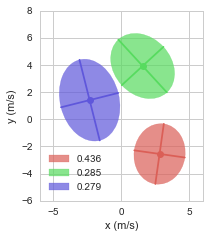

In [59]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [60]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.957  0.021      0.028  5.979092e-07      0.045       0.228

In [61]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUK3d9J/op7Wp1q/d9777GeGHx9ZYMOB48OAYHkhDz
7JBzOM8cJ5MQBsJug9eHfYMN2GRe4DjBPOCM7Ynt+AwPHDhMWAx+IWAwd5wDXsjcVner1d1aWltr
l2p5f7S/1aVS7Sp1S5f6nONzfa+qfvqVVPXRd/18GUEQBDhw4MDBWQrXcW/AgQMHDjoJh+QcOHBw
VsMhOQcOHJzVcEjOgQMHZzUcknPgwMFZDYfkHDhwcFbDITkHDhyc1XBIzoEDB2c1HJJz4MDBWQ2H
5Bw4cHBWwyE5Bw4cnNVwSM6BAwdnNRySc+DAwVkNh+QcOHBwVsMhOQcOHJzVcEjOgQMHZzUcknPg
wMFZDYfkHDhwcFbDITkHDhyc1XBIzoEDB2c1HJJz4MDBWQ2H5Bw4cHBWwyE5Bw4cnNVwSM6BAwdn
NRySc+DAwVkNz3FvwMHxQxAE1Ot1sCwLt9sNr9cLl8sFhmGOe2sOHLQNRhAE4bg34eD4UKvVkM/n
MTAwgEajAQDY2dnB8PAwBgYG4HK5HNJz0NNwLLnfYHAch0qlglQqhVAoBJZl4fV6IQgCBEEAx3Fg
WRb1eh0Mw8Dtdjuk56Dn4JDcbyAEQQDLsuA4DgzDgOM4rK2tgeM4eDwe8DyPcrkMv98Pj+fwFiHS
q9VqcLlccLvdcLvd8Hg8Duk56Fo47upvGHieR6PRAH3tu7u7yGQyWFhYgM/nQ71eRzweB8MwaDQa
8Hg86OvrQzAYRF9fH9xud9N6tA7DMCLZeTyeluMcODguOJbcbwjI/eQ4DgDAsixisRh4nofX68XA
wADq9ToCgQC8Xi8GBwcRCoVQq9VQLpeRz+eRSCRE0iPik5IZy7IQBAG1Wg3JZBKTk5Pw+XwO6Tk4
Vjgk9xsAnufBsix4ngfDMCgUCtje3sbIyAjC4TCi0WjT8QzDQBAEMAyDQCCAQCCAkZERCIKAarWK
SqWCXC6HeDwOr9crEp6U9EqlEur1ukh65N46lp6Do4ZDcmc5KI5GyYR4PI79/X3Mz8+LlprRiAXD
MCKZSUmvXC4jl8thd3cXPp8PfX19EARBJFXgMA7okJ6Do4ZDcmcpeJ4Hx3HgeR4AUK/XsbW1BZ/P
h9XVVTGh0E6yQEp69J5k6fE8j62tLfj9fjGeFwwG4XId1J87pOfgqOCQ3FkInuext7eHfD6PhYUF
ZLNZxONxTExMYGRkpIXY5JYcuatm4XK5xHjd/v4+pqenxUxtJpNBtVqF3+9vcm+1SK9YLCIcDsPv
9zuk58AyHJI7y0DuKXBAHLFYDJVKBcvLywgEAi3Hd7Lsw+VyIRAIoK+vD8AB+VYqFVQqFaTTadRq
NQQCAdHSCwQCTaSXTCbh8XjAsqxj6TmwDIfkzhLIa98ajQaKxSKGhoawuroqkofauUBnCQ84IL1Q
KIRQKATgkPTK5TL29vZE0iNLj5IfZFmqubc+n8+p0XOgCofkzgLIa9/29vaQTCbh8/kwOzurea4S
OVh1V81CTnrUgUFdGCzLIh6PIxQKiZaeXiKDem8d0nNAcEiux0HWG3BAEtvb22BZFlNTU9jf3ze0
RrfUg7vdbvT396O/vx8AEIlEEA6HUa/XkUwm0Wg0miw9JdJrNBqoVqsi6TEMA6/X67i3v8FwSK5H
IXdPi8UiYrEYhoaGsLCwgFKpZIi81CweO4iv3TUYhkFfXx+GhoYAHFp65XIZiUQCLMuKpNfX1we/
399Ceru7u+IajqX3mwmH5HoQ0to3AEgkEshms5idncXAwIB4nFWSsYMAOkEickuPZVmR9OLxOFiW
bSpX8fv94l7ULD2H9M5+OCTXQxAEAel0Gl6vF4FAAI1GA7FYDAzDYHV1FV6vVzzW6EN7VPG3TsDj
8WBgYEAkdinp5XI5cBwnJlz8fn9TgkJKehTTI+JzSO/sgkNyPQJqzcpms2Kcant7G2NjYxgbG2t5
KNslr14kPiXS29nZEf/kOK5JbEBKejzPiwkcKel5PB54PB6H9HoYDsn1ADiOEwUtASCbzaJer2Nx
cVGsQbMKIsNSqYR8Pi92L5wNIIIi4ms0Gk2WHs/zIuH19fU1WXBS0ms0GigUCpicnHRIrwfhkFwX
Q55cqFarKBaL8Pv9OHHihGbG0KglR8fEYjGEw2HkcjmUy2V4PB5wHNfSmdDL8Hq98Hq9CIfDAIBG
o4FyuYxKpYJMJgNBEJosPSI9lmVRLpdF95ZhGMfS6yE4JNelkCqHAEAmk0EikUAgEMDg4KBuSYQR
kms0Gtja2gIArKysiP+eTCbF95V2JpDFIy3d6GWQpNTg4CAEQWiy9DKZDAAgGAyKQqJUnAw0W3oO
6XU3HJLrQkhr33iex87ODqrVKpaXl8WHr11I5ZbK5TK8Xq/oEjMMA5/Ph5GREXEP9PDL69XkpRt2
wq4yFiN7o2v2+XxNpFcul1EoFFCr1bC+vq5o6QEO6XUzHJLrIsjd03K5jK2tLQwMDIitWUbdULXj
BEFAIpFALpfD3Nwc+vv7kUqlNNdU6kwgN09eukEBfXqvdnFc5CAlPa/Xi0wmg8nJSZTLZZRKJezt
7cHlcjWVrKiRHnBQ/kI/Dp36UXCgDIfkugTy2rdUKoW9vT3MzMxgcHDQ0ppykiH31OVy4cSJE03z
G6TQI1K3292SxSyXy00BfUEQUCwWxcE3vfxQC4Ig9sj6fD4MDQ2JYxzL5TKKxSKSySTcbncT2Ust
OJ7nkUwmEQqFMDAw0DQUiDozHHQGDskdMyizubu7i4WFBXAcJ8qSr66uilYRwYwlJwW5p6Ojoy0l
J+2Wm3g8HoTD4aaA/tbWFqrVKvL5vNi5ILV4jgpG3VWzYBgGfr8ffr8fw8PDTaRXKBRE0pNet1Rw
QMnSo6FADunZC4fkjhGUXKAJWEREw8PDmJiYaKt5no4j9zSfz4tqwJ0GWSdjY2Pw+/1ibEtq8Ugf
fjWLsltghCiVSK9Wq6FSqWB/fx+JREJUSwYOExpy97ZerwNAy1Agh/Sso7vvrrMYUveUpJG2t7fF
OJkazFhdPM8jEonA7XY3qQGrrSn/0w5IY1tyN48efq3hON0AK5+FdD4GkV40GoXH42kZCiSdhEZk
RkOH5DNvHdIzD4fkjhhKum+xWAyCIGjGyeRr6KFYLILneYTDYcWOiOOCksUjHY4jnRNB1k07sMtd
bXcNyriGw2FxBgZddz6fRzweh8/na0pkqJHe7u4upqenmyahdcv3241wSO4IIZ+alc/nsbOzg5GR
EXHGqR70bmae50X3lGEYjI+PG9rbcbVxyYfj0JyIcrkMnucRjUZV1YOPCp2I65kZCiSdhMYwDCqV
itgF41h6+nBI7oggrX0TBAE7OzsolUpYWloSSxSMQMuVpGE1Ho8HKysrOHPmjOE15X9v14ICrBGn
fE7E7OysmL1NpVKo1+tN1k4vFSZrkaXWUKBsNovd3V1xKBBlr+k8wHFvteCQXIeh1Jq1tbWFYDCI
1dVVuN1ucBxnaiyg0rFkFY6Pj2N0dFRMOpjZZzc+CGrqwVJNOXmNnvQ6jrKg2M51pGQ/OjraZOEK
goCNjQ3FoUBS0mNZ1iE9OCTXUcgb69PpNJLJJKampjA8PCz+u5lAv/xYnucRj8dRKBRaGvbNrGk3
7CIFObQ05ZSa7ruJvNvZi5T0MpkMVlZWUKvVUC6XdYcCAcqkV6vV0N/ff9Z3ZDgk1wEIggCO4/DC
Cy/gxIkTAICdnR3U63WsrKyIYo4Es9lMOrZWq4mzVPUa9o2sSTd6L2nMyeWV5E33LMsinU5jYGBA
bMUyi24jSqC

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOcAAAC0CAYAAABv7jt5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QVNf5x7/LLguEXSVG3hQBRckPLYnxLUnTYkOqaRyT
hqEECCGTCaOtrWkSrWNsFJ1EhcY2/aMYbeykKuqImj+ibccmlajTZGJEiyHhzYAsIgpoQrKLhJdl
f3+Qe7l7uffcl7179y6cz8zOrPftnF357vOc5zznPCaPx+MBhUIxHCGB7gCFQhGGipNCMShUnBSK
QaHipFAMChUnhWJQqDgpFINiCXQHpLhw4UKgu0AxOPPnzyee/1/1KQy5owTPWa1WpKen+6NbPmN4
cQLAka1n/fp8p8sJu83u1zZINH7Vy75PSZ9GvNbpdMJul9fXppqr7PvUSRHqOqcSvb7TpzZmSF4z
5I5CbGKJ4LmO1g1ad0kzgkKcYxlGmFKiVAPzzKaaq2w7eouUoh465gwg/hQml5T0aWwbjV/1ellq
inGh4gwAXIH4W5hc+CKlGBsqTp3hilJPYXKhVjQ4oOLUkUBYSzGoFTU+VJw6ECg3Vg7UihoXGq31
E/w/dF9EWeP8mn0/6HbD4hxk/51uv1P1cxn4UV0a0TUGVJwaoqUgAW9RpsyKA+A9z9l0+YbXNYBv
YmWt6Pfzo1SkgYWKUwZK3D0t3FYhUQq2xTvHFauvIqVzo4GHilMCPceKckUpBnMPI1ItrCgVaeCg
ASECegmzxvk1apxfI2VWHPvyBeZ+5rk+PWucR3WHhoZQXFyM3NxcFBYWwuFweJ2vrKxEdnY2cnNz
ceTIEa9zly5dQmFhIfvvW7duYdWqVSgoKEBeXh5aW1uJbVPLKYKewgTUWUoSWlpRYPyOR//zn/+g
v78fFRUVqK6uRmlpKXbt2gUAGBgYQElJCY4dO4aIiAjk5+cjMzMTkydPxp49e3D8+HFERIx8Tzt2
7MDjjz+OZcuW4ZNPPkFzczMSExNF26aWUwA9hMm1aloLk4uWVhTAuLOiFy5cwI9//GMAwNy5c/H5
55+z55qampCYmIiJEyfCarVi/vz5OH/+PAAgMTERf/nLX7yedfHiRXR0dOC5557DiRMnsGjRImLb
VJw8Gr/q9Xv2DleUSoR5qacLlz09itvjtqOVQFPSpwXV3Oi53iTBlxQulws2m439t9lsxuDgIHuO
u0IoMjISLpcLAPDoo4/CYvF2TK9du4YJEyZg7969iI+Px549e4htU3F+D/OHZkRreamnC5d6upCa
FOP1b6VQK6ocm82Gnp6RH8ShoSFWdPxzPT09xOV8UVFRyMzMBABkZmZ6WWEhqDg5GM1ackXICDMh
xobUpBikJsWw55UIlW9FtQgYAWNXoPPmzcPZs8Priaurq5GamsqeS0lJgcPhQHd3N/r7+1FVVYX7
7rtP9Fnz58/HmTNnAADnz5/HzJkziW3TgBCAtl4TzGZtn8n/o1dqKRkYUQrBnGt0dLL33BsZLasN
fsAIUD83ysyLjkWWLFmCjz76CHl5efB4PNi+fTtOnDiB27dvIzc3F6+88gqKiorg8XiQnZ2N2NhY
0WetX78eGzduxOHDh2Gz2fCnP/2J2LbJ6Du+X7hwwe87IdR1uZA6N9nn5/giSECeKEk7DDQ6OgHI
FyiXpss3AKgXaBMviqvnTghS25RcuHABLdGHBM8ldz0teX+gGPeW01d3zNfEAQa++6oGdkyqQqSs
q6tSpNysovEyzeJvxr04ASA+5S7F9xhJlHxSk2JYV1epFfVFpGPZvQ0EARFnVlYWG55OSEhASYnw
5ktGQytBMigRZvVABwDAbXFjPqTdRV8ECgx/PjXj0ZT0aWisuYp4q+ImKTx0F2dfXx88Hg/Ky8v1
bnoUzNSJ0+kkXmcEUQJA2pQYOJ1OVDuHj80NFQ8+MM/3VaCAuiyjtl4T0mzS11HE0X0qpb6+Hr29
vXj++efx7LPPorq6Wu8uKEJtwoAYaoSZNiUGaVNGrmfeVw90eIlXCO7cqFqYzy536sVoC8qDFd0t
Z3h4OIqKipCTk4OWlhasWLECJ0+eHJVNwcXpIls2NbT1moaf/b3VFLOeg243pkydIGldpWAyexJi
hs0J6TM1WobPJUXZBPvmdDqRYB8Ouji6XbjgbkfqoLirG39XBNo6Xbj47Q3MMkWq/gwxcZFov/Yt
/td9EzPNYZLX13W5kBBh6MkAQ6O7OKdPn46kpCSYTCZMnz4dUVFR6OrqQnx8vOg9/gjJm/tHsoFI
GzVbnIOyN3Hmw7VWZpglrSVjBc0we1lKLvy+/sBuR117J5rMt4lubprNjkZHJ5rxnSoXl+Hu/7Oj
6fINtGCQ7OamAJ0t3bDbaORWLbq7tceOHUNpaSkAoKOjAy6XC9HR6v9YjAg/s4d5kRBzYeXAdXNJ
8NP/1Lq6Stz7sZo5pAe6W85f/OIX2LBhA/Lz82EymbB9+3aiSxssyM3q4cMP+KglbUoM6to7UT3Q
QbSg3L6pySxiSJkVh5rLN4jWk06t+IbuqrBarZJpS8GG2rlKrrWUosEzvDB3MNyNOSJTKYxA5cLt
L5O4ACgTqpwoLk1MUEfwm6wA429hMqKcHT183WfXr6PB04q7TcKLdNOmxKC6nWw9hVCTp8vMhRKv
MYj1bHa1CR5P1rcbiqDiJCB3xYY/3FhGlMCIMAFgus2Gq9/1EgXKtKNUoMBokcqxolrstOBvut0/
DHQXFEOXjElACn4oDajIDfpwrSVXmAzMMa6AucgNEJGQOz8qJzjELMymKIOKUyVKkwnkuLENnlY0
eFpFRclFb4GSRMokKFC0hYpTAqkxlVyUWEu5SF3rS/SXQc40kFyo9VTGuBSn3D8S0jjKl4l8MZQI
Uy5pU2J8sp5cpFxckvWkKX3KGZfiBMbfH4uvApUag/pzB8HxyrgVp1Y0OuTPK4rBjDP9hRbjT0Db
NacUaag4JUi33yk67vSHa+svtBh/MpDcW6nAEB13yoeKM8D422ry8af1lHJtx9tQwldoEoKf0SoY
owXc/FshlCQtqF3ATZHPuBOnWreq6fINQctwb2Q0Ljk6iRZFzKUUm6P0JyT3trp9RLRSyfNajLUp
ZMalW6vUvfI1NU1JMroSaru0fS53LtYXiz+Wxp1aVhmrq6vD008/jcLCQhQVFeHmzZvEtselOP2B
mCVhLJCQQJncWDUiY+4h5deqRW7wSCgwNNbGndwqY2vXrmXXIgMjVcbeeecdlJeXo6KighXcnj17
sHHjRvT19bHXb9u2DZs2bUJ5eTmWLFlCa6XoATP20lugfGHWtXdqaqVJ1nO8TKtoWWXszTffRFpa
GgDA7XYjLIy81QsVp0ZoJVA5IpW6RguBajn1YgTqum8IvqTQsspYTMzwd3rx4kUcOHAAzz33HLHt
cRcQ8ieMQJmFy3zrwgiUCbxwBcAItMHT6iU+/jTLFZcLFotZ0GoybVQPdKCuvdNngclZGyoWtf3S
3Yf7ZOyvqxeRQ2mq7tOyyhgA/Otf/8KuXbvw9ttvY9KkScRrqeX0A75aUe6LsaZcq0oSptTz1SDm
3oq5tmMplU/LKmPvvfceDhw4gPLyckybJj32ppbTT9wbGY1LPV2sQIWsqBwLxxVig6cVid9NBkJH
X8e3blpZUKVbn4w1tKoy5na7sW3bNsTHx+OFF14AACxcuBC//e1vRdum4vQjrJv7vUjVCpThblMi
nPDew5YkHC1dXNLOCmM5ISEkJASvvfaa17GUlBT2fWZmJlsQl09CQgI7vWI2m/Hpp58qa1thXykq
ILm5vrigfHdWCC1cXJKwx0vUNhBQccpAi1X+WgtUjjB9eb4QShITpkydQPzegikRIVBQccpEiyCH
lEDnhsYqmqt

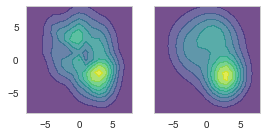

In [62]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='', ylabel='', colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='', ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [63]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

In [64]:
%%time
x = arange(0, max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x= x)

Wall time: 13.5 s


Speed Distribution Comparison
(0.98396418022565491, 0.97884377962469915, 0.98396418022565491)
Wall time: 8.36 s


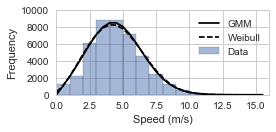

In [65]:
%%time
# Calculate Speed Distribution
# 1. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# y_ =[integrate.nquad(f_em, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
# y_gmm_em = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
# plot(x, y_gmm_em,'-.', color='black', label='GMM EM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [66]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# y_em_ = [integrate.nquad(f_em, [[0, x_val],[0, 2*pi]]) for x_val in x]
# y_cdf_gmm_em = array(list(zip(*y_em_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
# plot(x, y_cdf_gmm_em,'-.', color='black',label='GMM EM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
# plot(log(x), log(-log(1-y_cdf_gmm_em)),'-.', color='black', label = 'GMM EM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARAAAADSCAYAAACCXZ8eAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdAU1f/x/F3wlAkCAIqDnDvDdaFG/esouJCrfax2J8D
q1a0Sp1oS12Pq9qqtVjrqlbxcdTV2uIkiKMoLooLRESrCZvc3x+UW1MsKiaEcV5/mXPCzYeb8PXe
m3POVUiSJCEIgpALSlMHEASh4BIFRBCEXBMFRBCEXBMFRBCEXBMFRBCEXBMFRBCEXDNqAbl48SLe
3t7Z2o8fP46npydeXl7s2LHDmBEEQTAic2Nt+KuvvmLfvn1YWVnptaelpbFo0SJ27dqFlZUVQ4YM
oWPHjjg6OhoriiAIRmK0IxAXFxdWrlyZrf3WrVu4uLhga2uLpaUlbm5unD9/3lgxBEEwIqMdgXTt
2pV79+5la9doNNjY2MiPra2t0Wg0r9yeWq02aD5BEF6fm5vbS9uNVkD+jUqlQqvVyo+1Wq1eQcnJ
v/0SeU2tVossL2GoLGGRcXyz7yKxd67y6P5N4mOieBwbxbP4O2g1z1/yEwrsHMpSzMqWh/ciATAz
t6SYlTXFS5SkUq2mVGvQGjMzS2Kif6eETSmKlyiJlbUdJVQlqeRcngSNLttWyzuqkICY+Oz/wb1J
nzYxEesSJQy6zRf9qUnFVmVp0BzTvJvKj3P6zzvPC0i1atWIjo7m6dOnlChRgtDQUMaMGZPXMYR8
ICwyjqPn7hD7WEtZ+xLUKJ3G/Ztq1m7cwc2IUNJSk+XnKpRKHMs4k6jVIkl//7GrbB1p0LIPLbuN
oKy9NeEX1JQq7Uyajpf+sZSrXFcvQ3lHFR7NXAg6EJEtn0czF4B839etVWVOX3pg8Nd6HXlWQIKD
g0lMTMTLyws/Pz/GjBmDJEl4enpStmzZvIoh5BNhkXF8E3yJqIgz/BFxhujroTx/8lDuV9mVwdrW
Ee2f8diXrczACSuwtCzGr3uWgbk1LjXdKOtcG8vimUXCyd4aj2Yu8v+oaYmJ8rZe9cfiWqsMAMfO
3SE2QStvK6v9bftu3U2UC5WhtvnPvuoV7YyS41UUBWU2bmE8VDeEgpglJiaGkePncOrobrTP4gEo
ZmWDS01XStnZcftaGPEP7wJgU6osVeq2oEP/SVQobfOvRwvePeriWqsMYZFxf/2xxFHNuYzeH0RW
X27/WHIrv7xHuc2R08/l+SmMULRknabExGtIfnyTqAv/49hP+0lPT8eyuDWN2/THqVIdqjVog4VF
Mc7+tJmnCbHUcvWgkfu7lKtcD4VCAbze0YJrrTK41irz0g99Vp9gOKKACEYTFhnH5v2XuRr6ExdO
/kD8g1sAVKtRi4bu/bAo6czpgxsI/3U3PUfOoUajdnTtM5w93yzm/lPFK4uEYHqigAhGs3nHT2z/
aiEP715DoVRSo1E7Grm/S8NGTbh+ZjvfrfocSafDuUYTStiUAqB3xwaULVuGsmURRaIAEAVEMLhn
z57h7+/Pyv+uRJJ01HL1oHXPsdiUKoMkSayaP5a4e9ep4FyJroMmY+fcOE+vSQiGIwqI8NayrnPc
jH5I4jef8dOO5TyKi8WxrAtt+03EpaYbfybEosvIQGlmRseew6hRJp0ZM2Zkm+qQ37341bOTgzWd
injREwVEeCthkXEEHYjgz8cPOLpzGXevh2JmbsEH46cx8j/j2X7kJueObuHsT0G06f0Bjdv0Z9pk
nwL5R5f1u2aJidfIj3P7+5w9exZfX1+qV6+OJEmkp6czYsQIevTo8dLnP3jwgGvXrtGxY8dcvZ6h
iQIivJWj5+4QFXGGA9/OJS01GZeaTengOYlqdWrTqLojn0wdx6kjB7AuaY9zxYry160F0dFzd17a
fuzcnbf6nVq0aMGyZcuAzJHZ3t7eVKlShTp16mR77pkzZ7h9+7YoIELhcHjvd5zY/V/MzC1oP2AK
jVr2RKFQcDPqDu3ajSM0NJQOHTqwa9cu7O3tTR33rcQ+1r68PeHl7blhbW2Nl5cXBw4cYMuWLcTG
xhIXF0fHjh2ZOHEi69evJzk5mSZNmmBjY8OqVauQJAmtVsuSJUuoUqWKwbK8DrGgkJArOp2OqVOn
cvyH5VhZ2zLgw2XUaNxRHrORnHCb0NBQ3nvvPQ4dOlTgiweAk4P1y9vtX96eWw4ODkRERNC4cWM2
bNjArl272LZtG2ZmZowdO5ZevXrh4eHBjRs3CAwMJCgoiC5dunDo0CGD5ngd4ghEeC0vXjy0V5lx
Ysdijh/5H5Wr1qDDkLnYOpRDm5iI9tljrEs6MGncCHy83GnRooVcVAq6Tq+YM2MoDx48oEmTJly+
fJkzZ86gUqlITU3N9ryyZcuycOFCSpQowcOHD3F1dTVojtchCojwSi9ePEx8/oTvl31C7J2ruDVr
xZFD+4mKS+PYuTvs3bGds4c3seqrrX9dEyiY1zr+zevMmXlbGo2GnTt3MmDAAJKSkpg3bx7R0dHs
2LEDSZJQKpXodJmTCWfPns2RI0dQqVRMnz4dU8xKEQVEeKWsi4cJD+/w41d+PEuIobZbZzw/mEOp
UqWws5P4dm0AIfu/pGzZsjSpU9HEiY3HGKNgz5w5g7e3N0qlkoyMDCZMmECVKlWYMmUK4eHhWFpa
UqlSJeLi4qhZsyZr166lXr169OnTh2HDhmFlZYWjoyNxcXEGzfU6RAERXin2sZYncXfZsWoCydpn
NO8yghZdRxH/PA2AWbNmsWLFCqpWrcrx48epVKmSiRMXHM2bN+f06dMv7du3b1+2trJly3L48GEA
evbsadRsr0MUEOGVbCzT2PT1DJK1z+g4YDINW/UBMi8e7t+/n4CAAKpXr87atWtF8ShixLcwQo6S
k5PZ+/VMnsbf551Ow+TiAZkXD7t168aUKVM4dOgQpUqVMmFSwRREARH+lU6nY9SoUVy8cJ6uPd7F
c/hElEoF5R1VNK2UTnlbHebm5nzxxRdUq1bN1HEFExCnMMK/mjVrFtu3b8fd3Z0ff/ie4sWLA3Dj
xg1ateqOnZ0dly9fltuFokcUEEH24liPO1eO8sOGRVSvXp0ff/xRLhJxcXF069aN+Ph4Fi5cKIpH
EScKiADoj/W4c13Nj5sWUbxESQJXBck3/dJqtfTq1Yvbt28za9Ysxo4da8rIQj4groEIwN9jPeJj
otj/zacoFEp6j17Ajbi//4/x8fHh/PnzjBo1innz5pkqaqFz9+5dJk6cyKBBgxgxYgRjx47lxo0b
rFy5kjp16vDw4d+LTT9+/Jh69eqxe/du7t27R61atVi/fr3e9nx8fF56S1ljEEcgApA51iMlScO+
DTNJTdbSbfgsKlRtoDdRbPHixTg7OzN37txCMzz9RdOmTWPnzp0G3ebAgQMZPHjwv/YnJSUxbtw4
5s+fT5MmTQC4dOkS8+bNo1mzZlSuXJmDBw8yatQoAA4cOEC5cuXkn3dxceHw4cPy0eCTJ0+Ijo7O
s1vFiiMQAcicKPbL3tU8S4ilWafh1Hb1yGy3t+bhw4fodDoqVKhAQEAAFhYWJk5beJw4cYIWLVrI
xQOgYcOGfPvttwD06NFDb5LciRMn6NChg/y4VKlSODg4cOtW5nqzBw8epFu3bnmUXhyBCH+x1F4j
4twhSleoQfOuI+X21o3K0LlzZ8qUKcOBAwewtMx+B7TCIjAwkMDAQINvN6c7u927dw8Xl78n440b
Nw6NRkNcXBxNmzalfv36WFlZcffuXXQ6HU5OThQrVkxvGz179uR///sfEydO5NixY3z00UeEhoYa
/Pd4GXEEIpCQkMBnc6dhbmHB8A/nYWFhQXlHFd496rJr8wouX75MjRo1CnXxMBUnJye9e0ivXbuW
oKAgbG1tycj

0.0214513196221 0.092848223715
2.0 5.0
Wall time: 7.23 s


Direction Distribution Comparison


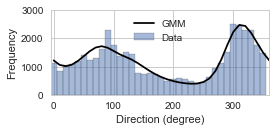

In [67]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

# y_em_ =[integrate.nquad(f_em, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
# y_em = array(list(zip(*y_em_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
# plot(x/pi*180, y_em,'-.', color='black', label='GMM EM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')

In [68]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.901235318546
Wall time: 9.34 s


## 6.3 Sectoral Comaprison

In [69]:
# %%time
# curve_collection = [direction_compare2(gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre)]

In [70]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [71]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 5.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

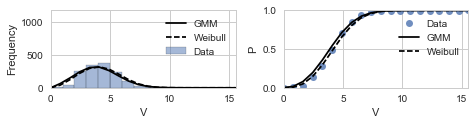

5.0 (-5.0 - 15.0) degree
data size: 1402 weight 0.032122809027379996
GMM Weibull
R square 0.92457569775 0.945695553485
max diff: 0.0758759582035 0.0476999443862 speed value: 3.27225166563 4.90837749845 y gmm 0.360469396149
 


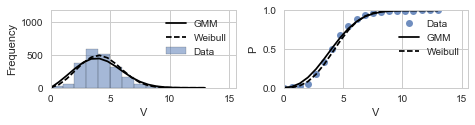

25.0 (15.0 - 35.0) degree
data size: 2152 weight 0.049306908007790126
GMM Weibull
R square 0.889890825679 0.937495145473
max diff: 0.0872579456632 0.0675789777196 speed value: 2.04762452071 4.77779054832 y gmm 0.13372634715
 


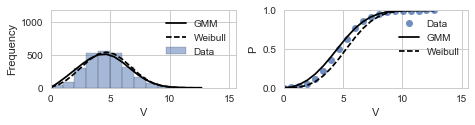

45.0 (35.0 - 55.0) degree
data size: 2636 weight 0.060396379883148124
GMM Weibull
R square 0.949503056083 0.976450916954
max diff: 0.0602951686686 0.124299586297 speed value: 3.33734396202 6.00721913163 y gmm 0.282222331036
 


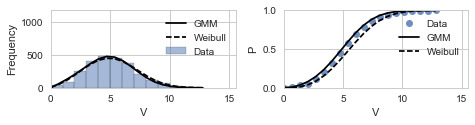

65.0 (55.0 - 75.0) degree
data size: 2514 weight 0.05760109978233475
GMM Weibull
R square 0.983256058733 0.978791036247
max diff: 0.0303652862982 0.103266355407 speed value: 3.36592038353 5.38547261365 y gmm 0.231240385741
 


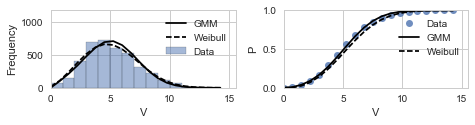

85.0 (75.0 - 95.0) degree
data size: 3940 weight 0.09027379997708787
GMM Weibull
R square 0.959214852235 0.970945965422
max diff: 0.0315770858128 0.0775689776886 speed value: 5.25455072016 5.25455072016 y gmm 0.53314372637
 


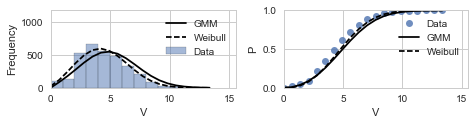

105.0 (95.0 - 115.0) degree
data size: 3173 weight 0.07270019475312178
GMM Weibull
R square 0.856852754877 0.955320681516
max diff: 0.121393322971 0.0987854564453 speed value: 4.21665781381 4.21665781381 y gmm 0.369939800256
 


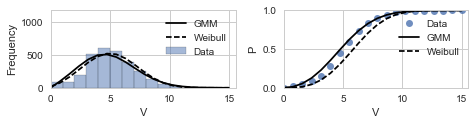

125.0 (115.0 - 135.0) degree
data size: 2938 weight 0.06731584373925993
GMM Weibull
R square 0.913086330179 0.944437116256
max diff: 0.0767587126231 0.158497006304 speed value: 3.15267798985 5.51718648223 y gmm 0.229583763678
 


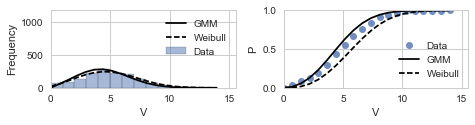

145.0 (135.0 - 155.0) degree
data size: 1521 weight 0.034849352732271736
GMM Weibull
R square 0.888714666775 0.95633108109
max diff: 0.0765472674282 0.154440299255 speed value: 5.87605602958 5.14154902588 y gmm 0.742556471899
 


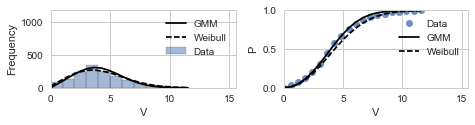

165.0 (155.0 - 175.0) degree
data size: 1506 weight 0.03450567075266354
GMM Weibull
R square 0.943750119443 0.931634093743
max diff: 0.0351184560472 0.0837526528419 speed value: 7.28775633496 4.2511911954 y gmm 0.945477021784
 


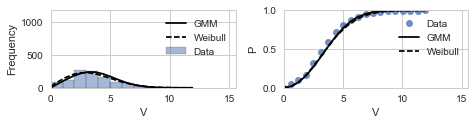

185.0 (175.0 - 195.0) degree
data size: 1107 weight 0.025363730095085347
GMM Weibull
R square 0.912735858138 0.93355773859
max diff: 0.0665697906866 0.0628582989323 speed value: 3.13471732174 4.38860425044 y gmm 0.39955487056
 


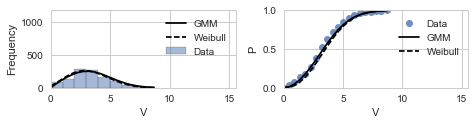

205.0 (195.0 - 215.0) degree
data size: 1124 weight 0.02575323633864131
GMM Weibull
R square 0.916138565915 0.9396729488
max diff: 0.0643167760583 0.1009222085 speed value: 3.65965220586 3.65965220586 y gmm 0.570024860952
 


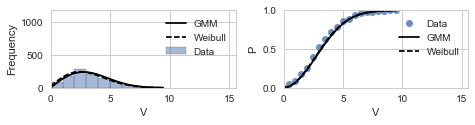

225.0 (215.0 - 235.0) degree
data size: 1062 weight 0.02433268415626074
GMM Weibull
R square 0.956777153451 0.977720917697
max diff: 0.0664321061753 0.0517394587322 speed value: 2.98927797662 2.98927797662 y gmm 0.458991622638
 


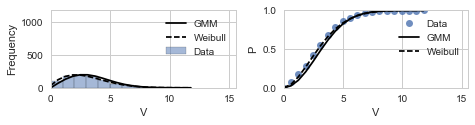

245.0 (235.0 - 255.0) degree
data size: 877 weight 0.020093939741092907
GMM Weibull
R square 0.933376303544 0.992842736182
max diff: 0.0851155056147 0.0357468743376 speed value: 2.48126745198 1.24063372599 y gmm 0.340198063371
 


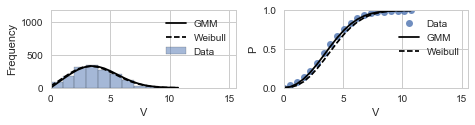

265.0 (255.0 - 275.0) degree
data size: 1593 weight 0.03649902623439111
GMM Weibull
R square 0.979013344358 0.984540258533
max diff: 0.0339796645307 0.097953180032 speed value: 3.94632023872 3.94632023872 y gmm 0.536641804396
 


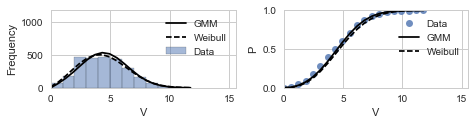

285.0 (275.0 - 295.0) degree
data size: 2641 weight 0.060510940543017526
GMM Weibull
R square 0.94087970202 0.966728198118
max diff: 0.0571079150668 0.0760234847578 speed value: 3.09255344268 3.09255344268 y gmm 0.230661869106
 


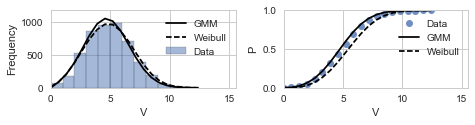

305.0 (295.0 - 315.0) degree
data size: 4987 weight 0.1142628021537404
GMM Weibull
R square 0.990432286808 0.990303738535
max diff: 0.0394090462794 0.114740166914 speed value: 5.21405957498 5.86581702185 y gmm 0.599665713615
 


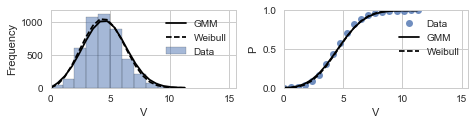

325.0 (315.0 - 335.0) degree
data size: 4622 weight 0.10589987398327415
GMM Weibull
R square 0.955477946405 0.972139088094
max diff: 0.0477302699195 0.0483733686819 speed value: 5.93560153724 5.34204138352 y gmm 0.77658820693
 


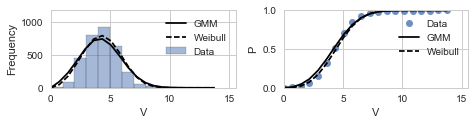

345.0 (335.0 - 355.0) degree
data size: 3270 weight 0.07492267155458815
GMM Weibull
R square 0.932680064643 0.962368580475
max diff: 0.0699270793471 0.0542527873121 speed value: 2.89305645382 5.78611290763 y gmm 0.223749709317
 
Wall time: 48 s


In [72]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9396139219909876 0.9651949046863344


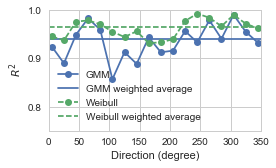

In [73]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.059811902817938044 0.0892760018239858


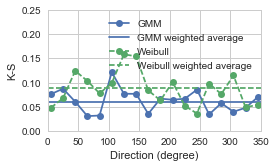

In [74]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

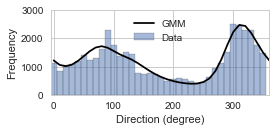

In [75]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [76]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [77]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


105.0 (95.0 - 115.0) Degree Speed Distribution
0.132999104692 5.0 0.504567866629


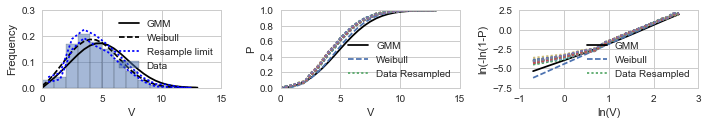

In [78]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [79]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


105.0 (95.0 - 115.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl8G/WZ/98zo8v3fcRxfMRJOJqmXIFytmxgSwO0W5YU
UspVIJQCPwoUyt0AKaGE7tJyLS1b7pYUKFtSSijQcCxtF0obCLS5nINctmVLlnWPRjO/P5yZjGRJ
lm3ZluJ5v168cCxr9NU1n3me7/N8HkHTNA0LCwsLCwuLjIiTvQALCwsLC4tCwBJMCwsLCwuLLLAE
08LCwsLCIgsswbSwsLCwsMgCSzAtLCwsLCyywBJMCwsLCwuLLLAE08LCwsLCIgsswbSwsLCwsMgC
SzAtLCwsLCyywBJMCwsLCwuLLLAE08LCwsLCIgsswbSwsLCwsMgCSzAtLCwsLCyywBJMCwsLCwuL
LLAE08LCwsLCIgsswbSwsLCwmDB27NjB//t//4+vf/3rnHfeeSxZsoRNmzZx//33c9BBB9Hd3W38
bV9fH5/5zGf4zW9+w86dOznggAP42c9+lnC8b3/725x77rkTsnZLMC0sLCwsJoRwOMxll13GhRde
yK9//WuefPJJrrjiCu644w4A2traeOWVV4y///3vf8+0adOMf7e0tPDqq68a//Z6vWzfvn3C1m+b
sEeysLCwsMgbrrvuOp577rmcHnPRokWsWLEi7e1r1qzh85//PIceeqjxu3nz5vHkk0/ywAMPsHDh
QlavXs0FF1xg/P2JJ55o/G1VVRWVlZV0dnbS0dHBK6+8wimnnMJf//rXnD6PdFgRpoWFhYXFhLBz
505aWlqMf1922WWce+65nHLKKXR1dVFbW0tRURE7duxg+/btNDY24nQ6E45x6qmn8vLLLwPwxhtv
cNJJJ03Y+q0I08LCwmIKsmLFiozR4HjQ2NjIxx9/bPz74YcfBuDrX/868Xgc2CeIiqJw+umn8+67
7yYc46STTuKcc87hjDPOoK6uDpfLNWHrtyJMCwsLC4sJYcGCBfz5z39m7dq1xu+2b99OV1cXgiAA
8KUvfYk33niDv/71rxx11FFDjlFSUkJ7ezsrVqzgtNNOm7C1gyWYFhYWFhYTRElJCQ8//DBPPPEE
3/zmNzn77LO56aabuPHGG2lqagKgrKyMxsZGDj74YEQxtUSdfvrpfPDBBxx99NETuXwETdO0CX1E
CwsLCwuLAsSKMC0sLCwsLLLAEkwLCwsLC4sssKpkLaYkqqqiKAqyLCNJEqIoIkkSkiQZxQcWFhYW
ZizBtJhSqKpKd3c3VVVVxr81TUPTNILBIH6/n6amJkRRRBAES0gtLCwMLMG0mBKoqko8HkdVVfbs
2UNlZSWqqhKLxbDb7YYY6gKq94TpNXGCIBgCagmphcXUxBJMi/0aPfVqLgbXNA23243H40EQBOLx
OA6HA1EUURSFYDCIw+HAZrMliGG2Qmqz2Yx/W1hY7D9YRT8W+yXxeBxZlpFl2RA3RVGMSQiyLNPe
3k57ezszZ86kvr4ep9OJpml4vV4+/fRTOjs7+fTTT+nq6sLr9RIMBg3x1YUS9gmpoihEo1EjtRsI
BAiFQoTDYaLRKPF4HKuLy2Iqc/755/PRRx8Bg9/Bww8/nEcffdS4/dxzz+Wf//znkPu9/fbbrFy5
kp07d/L1r38968c79thjjeN2dnaOcfVWhGmxnxGPx43Uqy5qiqLQ29uL1+ulvLwcURSZNm0akiQZ
RT9FRUVomkY0GqW5udk4VjQaRZZlotEogUDAEGCn04nD4cDhcBg/DxeRRqNRAERRNCJQPa1rRaQW
U4Fjjz2Wv/71r8ybN48PPviA4447jrfeeouLL76YaDTKrl27OPDAA4fc74QTTgAGvWgnE0swLfYL
UgllLBajt7eX/v5+Kioq6OjowOFw4Pf7E1Kq6ZAkieLiYoqLixN+r1fX6mIaCASIRqMIgpAgoPrP
yfucZiGNxWJGxKrvi5p/toTUYjxpaxv6u8WLYfny0d2+bVvmxzvmmGN46KGH+Na3vsVbb73FokWL
uPfee/H7/XzyyScceeSRvP/++/znf/4nkiQxY8YM7rjjDlatWsWWLVs4++yz8Xg8fPvb36avr48v
fvGLXH755dxwww0sXLiQE044gbfffpvf//733H333SN7MbLAEkyLgiaVUMqyTG9vLz6fj8rKSmbN
moXdbh/2WIIgZJUytdls2Gy2BCHVRVAX0UgkwsDAALIsIwiCIaJmMdXF0ZzaVRTF+FkXUrNwxuPx
lCJsYVEIHHzwwWzZsgVN03j//fe55pprOProo/nTn/7Ehg0bOO6447j11lv55S9/SU1NDffddx8v
vvgiNts+qQqFQqxYsYLi4mLOOeccFixYMGHrtwTTouDQNC2h6tUslG63m4GBAaqqqpg9e3bCF00n
W2EcCYIgGEJaUlKSsFZ9b1OWZcLhMP39/UYq2Cyi+v91cTRX7qqqCsDmzZtpa2szCouSi43M97Ow
GI7hIsKx3p6MKIoceOCBvP3229TV1eFwODjhhBN48803Wb9+Peeccw633nor3/3udwGIRCIcc8wx
tLa2Gsc48MADKSsrA+Czn/0sW7duTXiM8awTsATTomBIJ5TRaBS3243f76e6ujqtUOqkE8zxElK7
3T4kwtU0jVgsZhQmhUIhQ0htNtuQ/VFdSPVjQqKQmlPM6fZILSzygWOPPZZHHnmEU089FYDDDz+c
hx56CBgcEN3Y2MhDDz1EWVkZb7zxBsXFxezZs8e4f2dnJ8FgEKfTyUcffcRZZ53Fn//8Z9xuNwD/
+Mc/xm3tlmBa5D26UHo8Hvr7+2lpaTGEsqenh0AgkJVQJjOZkZi+3+lwOBJ+rwupeX9UlmVisRg2
m814HVwul3H/5KjSLKSyLBuPlyykyUVKFhYTwTHHHMMtt9zCPffcA4DD4aCsrIyDDjoIURS5+eab
WbJkCZqmUVJSwj333JMgmBUVFVx99dV4PB4WLlzIrFmzWLRoETfddBOrVq2iLdXGa46wppVY5C36
vqDejhEIBOjr66OxsRG3200gEKCmpoaamhokScr6uJs2bWLGjBm4XC5DUACi0Sh79uwZ1y/caNE0
DVmW+fTTT6msrDREVVEU7Hb7kNSu2Ywh3fFgqJDabDZrf9TCIg1WhGmRdyQLpXmPMhwOs23bNmpq
amhqahqRUOqMR+p1vNELhwRBoLq62njeuluRHpHqhUa6kCbvj+pCOpKI1HI1srAYxBJMi7whnVCG
QiHcbjehUAhRFJk9e/aY9+Qmag9zvBFFEafTidPpTPi9qqoJrS/6/qjuapTc+pKqYEgXUvNroqdz
LXtAi6mIJZgWk04moezp6SESiVBXV0dNTQ3d3d1jFsupcHIXRRGXy4XL5Ur4vdkBKRqNEgqFiEaj
qKqasvUl1T5nsj2g/nh6WjcWi+FyuYZNC1tYFBqWYFpMGumEMhgM0tPTgyzL1NXV0dLSgiiKhMPh
nESAE1klm2/orkZFRUUJv9eFNLnYSNO0lK0vmcwYtm3bRlNTk5FCtgzrLfYXLMG0mHBSCSVAIBCg
p6cHRVGoq6ujsrIy4cSaK0EzH2cqiGQ2pBPS4VyNksVUkqSE99Sa/GKxP2EJpsWEYTYph32pUb/f
T09PD/F4nPr6eioqKtKeOMdT3CzxHMpoXI3MrS/ZRKTpUrvW5BeLfMMSTItxJx6P4/V6KS0tBfYJ
08DAAG63G1VVqa+vp7y8POOJcTwiTIuRM5yr0fbt27HZbEQiEXw+X1auRuZjWIb1FvmKJZgW44bu
yhOPx9m+fTuf+cxnAPD5fIYrR11d3bBCqTPegmkJ6djQXY0EQaCystIwkcjkaiRJUspio0xCmmxY
n9z+YgmpxXh

### 6.4.3 Adjacent Sector Variability

In [80]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [81]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


105.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl8XGW9/z9nmcksyWRfmiZpk5K2cKG2Ak1LvVUWhaty
Zc2FYgVZ24vXS1Gw8LNUvPeigiBwFRUVkYLWsggoixeqUChYy77YNWlLkyazJJPJ7Gf9/TE8p2dm
zuxLtuf9evGimeTMc84sz+d8v8/3+3kYVVVVUCgUCoVCSQs70SdAoVAoFMpUgAomhUKhUChZQAWT
QqFQKJQsoIJJoVAoFEoWUMGkUCgUCiULqGBSKBQKhZIFVDApFAqFQskCKpgUCoVCoWQBFUwKhUKh
ULKACiaFQqFQKFlABZNCoVAolCyggkmhUCgUShZQwaRQKBQKJQuoYFIoFAqFkgVUMCkUCoVCyQIq
mBQKhUIpG4cPH8bXv/519Pb24itf+Qquvvpq7Nu3D//7v/+LY489Fk6nU/vbkZER/NM//ROeeOIJ
DAwMYMGCBbj//vvjnm/NmjVYvXp1Wc6dCiaFQqFQykI4HMbatWvx1a9+FVu2bMFDDz2Er33ta/ju
d78LAJg7dy6ee+457e+fffZZzJo1S/u5o6MDf/7zn7WfvV4vDh06VLbz58s2EoVCoVAmDTfccAMe
ffTRoj7nhRdeiDvuuCPl7//6179i2bJlWLJkifbYokWL8NBDD+HHP/4xPv/5z+P555/HZZddpv39
qaeeqv1tbW0tampq0NfXh3nz5uG5557DWWedhTfeeKOo15EKGmFSKBQKpSwMDAygo6ND+3nt2rVY
vXo1zjrrLAwPD6OhoQFWqxWHDx/GoUOH0NLSgoqKirjn+MIXvoBnnnkGALB161acccYZZTt/GmFS
KBTKDOSOO+5IGw2WgpaWFnzwwQfazz/96U8BAL29vZBlGcBRQZQkCWeffTa2b98e9xxnnHEGLrnk
Epx33nlobGyExWIp2/nTCJNCoVAoZeH000/H66+/jnfeeUd77NChQxgeHgbDMACAM888E1u3bsUb
b7yBnp6epOew2+3o7OzEHXfcgS9+8YtlO3eACiaFQqFQyoTdbsdPf/pT/OY3v8GXv/xlXHTRRbj5
5ptx0003obW1FQBQVVWFlpYWHHfccWBZY4k6++yz8eabb2L58uXlPH0wqqqqZR2RQqFQKJQpCI0w
KRQKhULJAiqYFAqFQqFkAa2SpcxIFEWBJEkQBAEcx4FlWXAcB47jtOIDCoVC0UMFkzKjUBQFTqcT
tbW12s+qqkJVVQSDQfj9frS2toJlWTAMQ4WUQqFoUMGkzAgURYEsy1AUBUNDQ6ipqYGiKBBFESaT
SRNDIqCkJ4zUxDEMowkoFVIKZWZCBZMyrSGpV30xuKqqcLvdGB0dBcMwkGUZZrMZLMtCkiQEg0GY
zWbwPB8nhtkKKc/z2s8UCmX6QIt+KNMSWZYhCAIEQdDETZIkbScEQRDQ2dmJzs5OdHV1oampCRUV
FVBVFV6vFx999BH6+vrw0UcfYXh4GF6vF8FgUBNfIpTAUSGVJAnRaFRL7QYCAYRCIYTDYUSjUciy
DNrFRZnJXHrppXjvvfcAxL6DJ554In75y19qv1+9ejV27dqVdNy2bdvw+9//HgMDA+jt7c16vBUr
VmjP29fXV+DZ0wiTMs2QZVlLvRJRkyQJHo8HXq8XDocDLMti1qxZ4DhOK/qxWq1QVRXRaBRtbW3a
c0WjUQiCgGg0ikAgoAlwRUUFzGYzzGaz9u9MEWk0GoUkSfB6vZg1axYYhtHSujQipcwEVqxYgTfe
eAOLFi3Cm2++iU996lN4+eWXceWVVyIajWJwcBALFy5MOm7lypUAYl60EwkVTMq0wEgoRVGEx+PB
2NgYqqurMW/ePJjNZvj9/riUaio4joPNZoPNZot7nFTXEjENBAKIRqNgGCZOQMm/9eucpLiICKko
ilrEStZF9f+mQkopJXPnJj928cXA976X3+8PHkw/3imnnIL77rsPl19+OV5++WVceOGF+OEPfwi/
348PP/wQS5cuxc6dO/GjH/0IHMehvb0d3/3ud/HHP/4R/f39uOiiizA6Ooo1a9ZgZGQEn/nMZ3Dt
tddi/fr1+PznP4+VK1di27ZtePbZZ/H9738/txcjC6hgUqY0RkIpCAI8Hg98Ph9qampwzDHHwGQy
ZXwuhmGySpnyPA+e5+OElESTREQjkQjGx8chCAIYhtFElOM4rQCJiKNeTCVJ0v5NhFQvnFRIKVOZ
4447Dv39/VBVFTt37sT111+P5cuX47XXXsOePXvwqU99Chs2bMBvf/tb1NfX4+6778Yf/vAH8PxR
qQqFQrjjjjtgs9lwySWX4PTTTy/b+VPBpEw5VFWFoijweDyIRqNobm7WhNLtdmN8fBy1tbXo7u6O
+6IRshXGXGAYRhNSu90ed65kbVMQBITDYSiKgv7+fnAcFxeRkv8TMdRX7iqKoj0fGY9l2aRiI/1x
FEomMkWEhf4+EZZlsXDhQmzbtg2NjY0wm81YuXIlXnrpJezevRuXXHIJNmzYgOuuuw4AEIlEcMop
p2DOnDnacyxcuBBVVVUAgBNOOAEHDhyIG6OUdQJUMClTBiKUJKIk0WU0GoXb7Ybf70ddXV1KoSSk
EsxSCanJZNIiXEEQMDg4iLlz50IURa0wKRQKYWxsDIIggOf5pPVRvZAS0glpMBiE1WqFxWLRIlIK
ZTKwYsUK/PznP8cXvvAFAMCJJ56I++67D0Bsg+iWlhbcd999qKqqwtatW2Gz2TA0NKQd39fXh2Aw
iIqKCrz33nv4t3/7N7z++utwu90AgH/84x8lO3cqmJRJDxHKxApVSZIQCATg8/myEspEJiISI6JM
1jvNZnPc71VVhSiKceujgiBAFEXwPJ8UjZrN5qSoUlEUjIyMoLa2NmVEynFcUpEShVIOTjnlFHz7
29/G7bffDgAwm82oqqrCscceC5Zl8f/+3//D1VdfDVVVYbfbcfvtt8cJZnV1NdatW4fR0VF8/vOf
xzHHHIMLL7wQN998M/74xz9irtHCa5Ggu5VQJi1kXZC0Y5DJPRKJaBGl2WxGZ2cnOI7L+nn37duH
9vZ2WCwWCIKgPR6NRjE0NFTSL5woijh8+DC6urpyOk5VVS0a1VfuSpIEk8mUlNp1Op2oq6uLSw8n
Ph+QLKQ8z1MzBgolBTTCpEw6jISSYRiEw2G43W6EQiHU19fDbrcjGAzmJJZAaVKvpYYUDlVUVGjr
NwA0tyIioqTQSBRFOJ1OWK3WODElrkapUrvkBkIvpNTViEKJQQWTMmlIJZShUAhutxvhcBgNDQ1o
a2sDy7Lw+Xx5C1+51jBLDcuympDqOXz4MCorK8GyLARB0NZHiatRYuuLUcEQEVL9a0LSueRvSWqZ
CillJkAFkzLhKIqCUCgEk8mUJJQulwuRSASNjY1ob2+PK17JV+AmenIvlyibzeaklKzeASkajSIU
CiEajUJRFMP1UaN1TtJDKssy+vr60N3dnVSxSyNSynSECiZlwiARZSQSQV9fHxYuXAiGYRAMBuFy
uSAIAhobG9HR0WFY5VmIYE5UhFlOATEai7gaWa3WuMeJkCYWG6mqatj6khhlUsN6ykyACial7Bil
XmVZRiAQgMvlgiRJaGxsRE1NTdqJtRiCORXTsKUglZCmczUiGYGxsTFDVyMge8N6KqSUqQAVTErZ
0JuUA0cjoGAwCFVVceTIETQ1NaG6ujqribPYYkfFM5l0rkbhcBjDw8MpXY2MItLE5yD/JhiZMVBX
I8pkgQompeToTQaAo8I0Pj4Ot9utVWh2d3fnNDEWOyVLyQ7SfmKz2cAwDFpaWgAcdTUiEWkkEoHP
59MM7tO5GhG

# 7. Result Variability & Cross-Validation

In [82]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.6 square_error


## 7.1 Variability of the Result

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.401  0.113   3.806  2.977  2.094  -0.057
2  0.323  0.208  -2.111  3.182  2.458  -0.536
3  0.276  3.461  -1.846  1.521  2.371   0.205

GMM Plot Result
0.400600069119 [[ 0.11274561  3.80580478]] [ 2.0871511   2.98178818] -94.4813278258
0.323471503972 [[ 0.20751601 -2.11070274]] [ 1.85055929  3.56990969] -122.015552132
0.27592842691 [[ 3.46080858 -1.84575595]] [ 1.46799474  2.40429213] 167.970506633


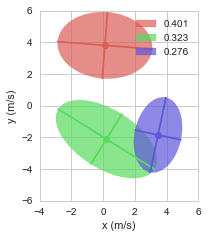

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.013      0.023  2.703284e-07      0.030       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.022  2.876027e-07      0.031       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.397  -0.161   3.755  2.912  2.107   0.010
2  0.335   3.370  -2.025  1.621  2.635   0.216
3  0.267  -0.022  -1.888  3.082  2.116  -0.449

GMM Plot Result
0.397367123025 [[-0.16121544  3.75481641]] [ 2.10663651  2.91182396] -89.1104853892
0.335316161992 [[ 3.37004691 -2.02483224]] [ 1.56229067  2.6709281 ] 168.443610067
0.267316714983 [[-0.02160456 -1.88782345]] [ 1.7704622   3.29337422] -114.68283393


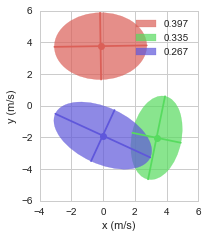

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.026  2.963306e-07      0.031       0.160

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.015      0.025  2.980632e-07      0.032       0.161

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.401  0.188   3.818  2.978  2.076  -0.132
2  0.334  0.137  -2.125  3.213  2.662  -0.578
3  0.265  3.466  -1.867  1.550  2.190   0.191

GMM Plot Result
0.400992901304 [[ 0.18842807  3.81806981]] [ 2.04169727  3.00141616] -99.8201893232
0.334008322483 [[ 0.1374434  -2.12520895]] [ 1.87175475  3.72882321] -125.934310795
0.264998776214 [[ 3.46601271 -1.86741474]] [ 1.49630756  2.227773  ] 165.760516204


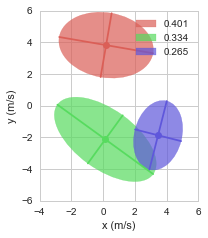

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.012      0.023  2.801103e-07      0.031       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.022  2.946328e-07      0.031       0.160

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.414  -0.189   3.750  2.953  2.176   0.020
2  0.316   3.404  -1.978  1.602  2.735   0.244
3  0.271   0.122  -2.003  3.078  2.048  -0.425

GMM Plot Result
0.413623602077 [[-0.18900653  3.75033918]] [ 2.17510437  2.95340669] -88.1587997851
0.315781815607 [[ 3.40367269 -1.977934  ]] [ 1.53043226  2.77586481] 168.230115621
0.270594582316 [[ 0.12164608 -2.00286365]] [ 1.75254972  3.25540956] -112.703409822


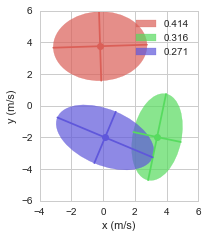

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.976  0.012      0.024  3.242390e-07      0.033       0.168

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.011      0.024  2.897449e-07      0.031       0.159

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.402  -0.077   3.797  2.951  2.091  -0.021
2  0.308   0.260  -2.054  3.157  2.252  -0.478
3  0.290   3.472  -1.874  1.543  2.593   0.236

GMM Plot Result
0.402038076668 [[-0.07701193  3.79674604]] [ 2.09000673  2.9515485 ] -91.7312132947
0.30835662931 [[ 0.26000371 -2.05351061]] [ 1.82467535  3.42207253] -117.113968711
0.289605294022 [[ 3.47198952 -1.87411807]] [ 1.4777911  2.6304677] 168.240605577


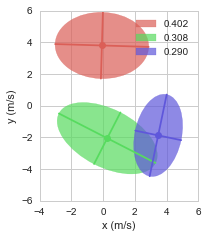

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.977  0.012      0.025  3.126017e-07      0.032       0.165

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.014      0.022  2.885160e-07      0.031       0.158

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.415  -0.046   3.743  2.978  2.129  -0.025
2  0.314   3.381  -2.022  1.588  2.588   0.224
3  0.272   0.130  -1.983  3.056  2.123  -0.479

GMM Plot Result
0.414674733404 [[-0.04633824  3.7433688 ]] [ 2.12743215  2.97939769] -92.1159924549
0.313686429225 [[ 3.38108498 -2.0218707 ]] [ 1.52568886  2.62492865] 168.124299347
0.27163883737 [[ 0.12951487 -1.9827848 ]] [ 1.72841836  3.29520999] -116.077829544


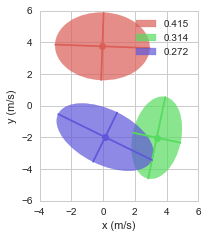

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.011      0.032  2.898459e-07      0.030       0.158

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.029  2.931030e-07      0.031       0.159

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.412  -0.083   3.723  2.935  2.140  -0.031
2  0.304   3.390  -2.041  1.602  2.691   0.261
3  0.284   0.196  -1.984  3.139  2.060  -0.471

GMM Plot Result
0.412264322176 [[-0.08340711  3.72292528]] [ 2.1374333  2.9369046] -92.7828295833
0.3037255218 [[ 3.38959743 -2.04113375]] [ 1.52010677  2.73788187] 167.143402419
0.284010156024 [[ 0.19581477 -1.98374128]] [ 1.70496682  3.34468667] -113.68661736


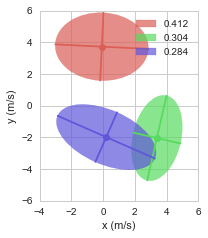

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.011      0.036  2.968318e-07      0.031       0.160

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.029  2.931047e-07      0.031       0.159

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.398  -0.142   3.783  2.907  2.152   0.005
2  0.314   0.342  -2.027  3.142  2.179  -0.421
3  0.288   3.481  -1.853  1.536  2.775   0.252

GMM Plot Result
0.397551509139 [[-0.14181188  3.78295832]] [ 2.15217499  2.90742286] -89.4968478768
0.314111535003 [[ 0.34161224 -2.02724469]] [ 1.85856463  3.34170885] -114.191111359
0.288336955859 [[ 3.48068361 -1.85281843]] [ 1.46652151  2.81226474] 169.067528985


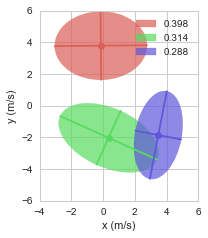

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.976  0.012      0.023  3.296369e-07      0.034       0.169

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.011      0.020  2.935503e-07      0.031       0.160

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.383   0.246   3.876  2.951  2.099  -0.105
2  0.331  -0.048  -1.936  3.169  2.718  -0.572
3  0.286   3.478  -1.816  1.560  2.323   0.154

GMM Plot Result
0.382732753095 [[ 0.24578101  3.87617118]] [ 2.07621851  2.96681426] -98.3986322784
0.331012231968 [[-0.04755585 -1.93620222]] [ 1.90045197  3.71692537] -127.462150454
0.286255014936 [[ 3.47751699 -1.81609249]] [ 1.5270867   2.34504803] 169.674901605


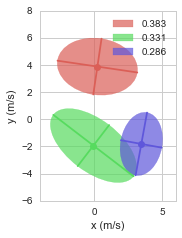

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.010      0.021  2.700685e-07      0.031       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.020  2.969183e-07      0.032       0.160

weight mean_x  mean_y  sig_x  sig_y    corr
1  0.401  0.032   3.816  2.898  2.112  -0.050
2  0.312  0.202  -2.051  3.153  2.393  -0.539
3  0.288  3.460  -1.759  1.555  2.498   0.222

GMM Plot Result
0.400544012314 [[ 0.03226607  3.81576326]] [ 2.10622891  2.9025716 ] -94.4229152364
0.311673774469 [[ 0.20190791 -2.05068642]] [ 1.80443131  3.5230094 ] -121.295079074
0.287782213217 [[ 3.46001545 -1.75927672]] [ 1.49464841  2.53513757] 167.872663636


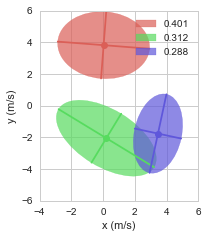

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.012      0.026  2.980697e-07      0.032       0.161

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.013      0.025  2.923328e-07      0.031       0.159


Wall time: 14.5 s


In [83]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [84]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of train/test dataset 32733.75 10911.25
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.123185  0.071200  0.000003    0.105231     0.532444  0.761788
1    0.121660  0.069634  0.000003    0.105526     0.533820  0.764751
2    0.119246  0.069568  0.000003    0.104425     0.527808  0.767455
3    0.122346  0.070826  0.000003    0.104686     0.536995  0.759934

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.120070  0.070548  0.000003    0.104010     0.532865  0.769887
1    0.128668  0.077966  0.000003    0.105585     0.541260  0.750080
2    0.133027  0.067245  0.000003    0.106349     0.546543  0.752923
3    0.123483  0.068673  0.000003    0.107194     0.526734  0.769250

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.047670  0.030094  6.627400e-07    0.046800     0.239802  0.951614
1    0.045999  0.029452  6.691437e-07    0.047700     0.240962  0.951772
2    0.045387  0.031591  6.824163e-07    0.047586     0.243194  0.951093
3    0.043719  0.030432  6.644599e-07    0.047877     0.240159  0.951892

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.056789  0.035845  7.823729e-07    0.052824     0.260451  0.945345
1    0.046745  0.027517  7.178523e-07    0.048463     0.249467  0.947774
2    0.055665  0.028928  7.053078e-07    0.049840     0.247724  0.947863
3    0.044271  0.030028  7.472609e-07    0.048422     0.254392  0.946412

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.023063  0.011725  2.831044e-07    0.031134     0.156748  0.979475
1    0.022219  0.012493  2.996999e-07    0.031683     0.161244  0.978210
2    0.020318  0.012871  2.882876e-07    0.031213     0.158168  0.979210
3    0.021059  0.012814  2.814707e-07    0.030563     0.156207  0.979773

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.031111  0.015137  3.452596e-07    0.033271     0.172960  0.975306
1    0.021773  0.012235  3.041402e-07    0.032265     0.162435  0.978445
2    0.026190  0.013333  3.254913e-07    0.032934     0.167962  0.976342
3    0.027795  0.016680  3.423751e-07    0.034719     0.172527  0.974840

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.016834  0.010278  2.363442e-07    0.028517     0.143211  0.982858
1    0.023726  0.008724  2.225859e-07    0.027271     0.138993  0.983970
2    0.019371  0.010498  2.560093e-07    0.029052     0.149009  0.981566
3    0.017267  0.010522  2.425277e-07    0.028689     0.145014  0.982394

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.024295  0.012516  3.405681e-07    0.032811     0.171811  0.975716
1    0.038762  0.009581  2.914900e-07    0.031704     0.158906  0.978737
2    0.024339  0.013947  2.943872e-07    0.032526     0.159869  0.978558
3    0.022266  0.019383  3.224905e-07    0.032575     0.167392  0.977060

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.025186  0.010001  1.889610e-07    0.025513     0.128023  0.986213
1    0.021280  0.008623  1.756444e-07    0.024104     0.123464  0.987372
2    0.018566  0.009007  1.793988e-07    0.024420     0.124764  0.987099
3    0.017451  0.007832  1.800362e-07    0.024726     0.124949  0.986965

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.030507  0.014220  2.456017e-07    0.027817     0.146006  0.982792
1    0.027323  0.016714  2.702411e-07    0.031000     0.153027  0.980204
2    0.025716  0.012219  2.285465e-07    0.028294     0.140769  0.983243
3    0.021963  0.008008  2.495538e-07    0.028630     0.147224  0.982091

Wall time: 43.2 s


In [85]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.121609  0.070307  3.271978e-06    0.104967     0.532767  0.763482
2    0.045694  0.030392  6.696900e-07    0.047491     0.241029  0.951593
3    0.021665  0.012476  2.881406e-07    0.031148     0.158092  0.979167
4    0.019299  0.010005  2.393668e-07    0.028382     0.144057  0.982697
5    0.020621  0.008866  1.810101e-07    0.024691     0.125300  0.986912

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.126312  0.071108  3.322936e-06    0.105784     0.536850  0.760535
2    0.050868  0.030580  7.381985e-07    0.049887     0.253009  0.946848
3    0.026718  0.014346  3.293165e-07    0.033297     0.168971  0.976233
4    0.027416  0.013857  3.122339e-07    0.032404     0.164495  0.977518
5    0.026377  0.012790  2.484858e-07    0.028935     0.146756  0.982083

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


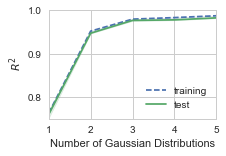

K_S


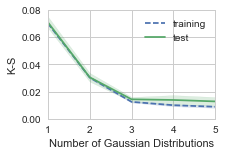

Chi_square


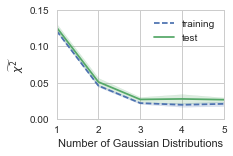

In [86]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

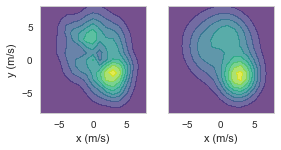

In [87]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

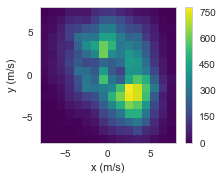

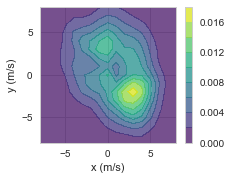

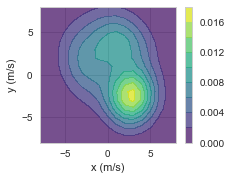

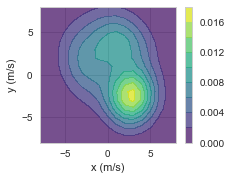

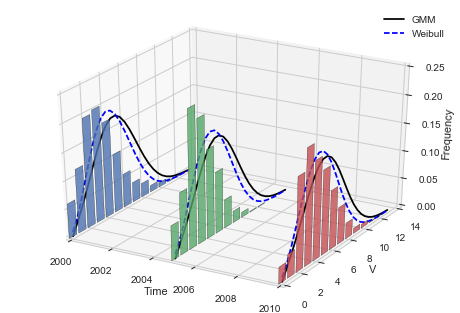

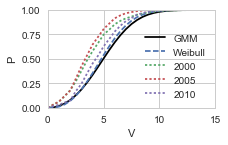

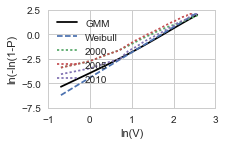

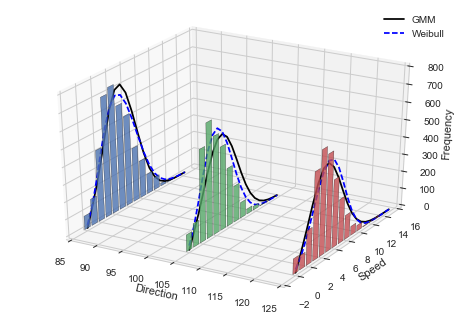

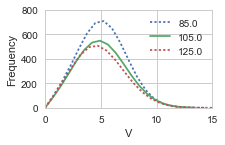

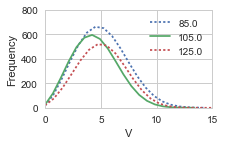

In [88]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [89]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

hongqiao_intl
